# Evaluation of data collected with probSAT

We tested probSAT with 55 hidden solution instances with $n \in \{50, 100, 150, 200, 300, 800\}$ variables.

The concrete instances can be seen below.

In [8]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [9]:
#
# Load all necessary modules
#

# Module for "Unix style pathname pattern expansion" 
# and "Miscellaneous operating system interfaces"
import glob
import os

# Modules for data analysis, plotting, etc.
import pandas as pd
import numpy as np
from scipy.stats import probplot
from matplotlib import pyplot as plt
from scipy.stats import lognorm
from scipy import stats
import seaborn as sns

# Load our own modules for analysis of ecdfs, survival functions, 
# confidence intervals, etc. and the respective plotting. 
# The corresponding files can be found in ./evaluation/jupyter.
from empirical import *
from plots import *

In [10]:
# Specify the base path of this experiment series.
# The base path is refined by folders incidating the number of variables.
path = '../../experiments/csvs_probSAT'
filters = ['n50', 'n100', 'n150', 'n200', 'n300', 'n800']

In [11]:
# List all instances under consideration.
instances = []
for filter in filters:
    instances += glob.glob(os.path.join(path, f'*{filter}*.csv'))

instances

['../../experiments/csvs_probSAT/gen_n50_m213_k3SAT_seed1181241944.csv',
 '../../experiments/csvs_probSAT/gen_n50_m213_k3SAT_seed958682847.csv',
 '../../experiments/csvs_probSAT/gen_n50_m213_k3SAT_seed3184935164.csv',
 '../../experiments/csvs_probSAT/gen_n50_m213_k3SAT_seed3163119786.csv',
 '../../experiments/csvs_probSAT/gen_n50_m213_k3SAT_seed2746317214.csv',
 '../../experiments/csvs_probSAT/gen_n50_m213_k3SAT_seed440213416.csv',
 '../../experiments/csvs_probSAT/gen_n50_m213_k3SAT_seed478163328.csv',
 '../../experiments/csvs_probSAT/gen_n50_m213_k3SAT_seed1051802513.csv',
 '../../experiments/csvs_probSAT/gen_n50_m213_k3SAT_seed107420370.csv',
 '../../experiments/csvs_probSAT/gen_n50_m213_k3SAT_seed599310826.csv',
 '../../experiments/csvs_probSAT/gen_n100_m427_k3SAT_seed136505588.csv',
 '../../experiments/csvs_probSAT/gen_n100_m427_k3SAT_seed2342331445.csv',
 '../../experiments/csvs_probSAT/gen_n100_m427_k3SAT_seed1812140442.csv',
 '../../experiments/csvs_probSAT/gen_n100_m427_k3SAT_s

In [5]:
# Count the instances.
len(instances)

55

## Visual inspection

In this section, we are going to inspect the data in a visual manner.

A detailed description can be found in the paper. For easier reference, we next provide a short guide.


### Log-histrogram; log-plot ecdf vs. cdf; ecdf vs. cdf; log-plot e-survival vs. survial

First row of plot:

* Histogram of the logarithmically scaled data. If a lognormal distribution is a suitable fit, this histogram should resemble the one of a normal distribution.

Bottom row of plots:

* **Left plot:** The left tail, i. e., the probabilities for very small values, can be checked visually by plotting the ecdf and fitted cdf with both axes logarithmically scaled. Thereby, the probabilities for extreme events (in this case, especially easy instances) can be measured accurately. The $x$-axis in such graphs corresponds to the time (in flips) until a solution is found, and the $y$-axis corresponds to the probability that a solution is found until that time. In red we depict the empirically collected data; blue is the fitted distribution.

* **Middle plot:** Plot of the ecdf and the fitted cdf on the same graph.

* **Right plot:** Lastly, the probabilities for particularly hard instances should also be checked. Any mistakes in this area could lead to underestimating the likelihood of encountering an exceptionally hard instance. For analyses of this type, the survival function $S$ is a useful tool; if $F$ is the cdf, $S(x) := 1 − F (x)$. Therefore, the survival function’s value $S(x)$ represents the probability that an instance is (on average) harder than $x$ in our case. If we plot the empirical survival function ($1 − \hat{F}_n (x)$) and the fitted survival function together on a graph with logarithmically scaled axes, we can easily detect errors in the right tail.

************************************************************************
0 : ../../experiments/csvs_probSAT/gen_n50_m213_k3SAT_seed1181241944.csv
************************************************************************
lognormal parameters: sigma 0.27886069640669336, mu 5.774317977591943, location 121.41726154308397


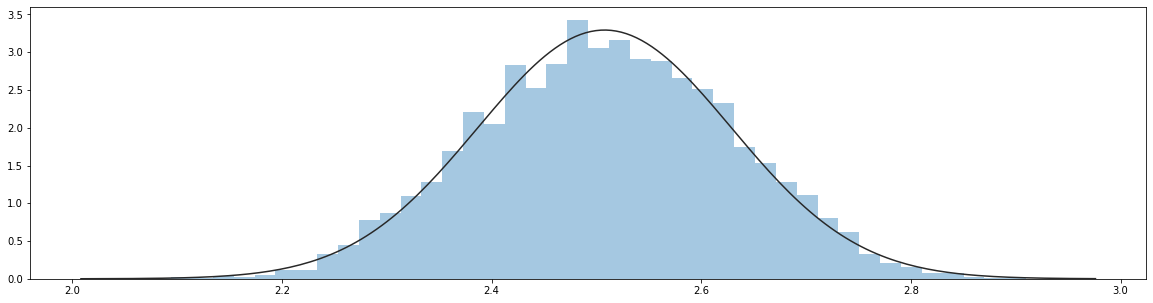

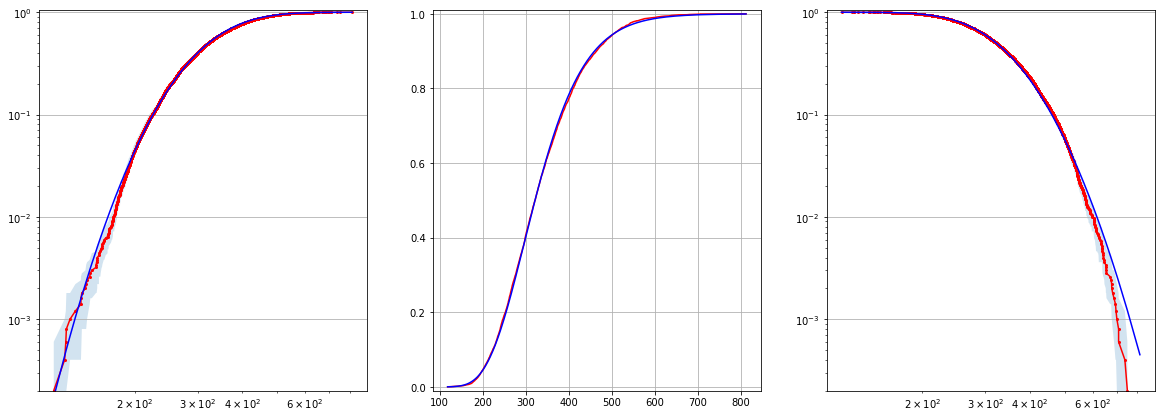



***********************************************************************
1 : ../../experiments/csvs_probSAT/gen_n50_m213_k3SAT_seed958682847.csv
***********************************************************************
lognormal parameters: sigma 0.4603038619883328, mu 8.654263308794182, location 4.436160567095453e-06


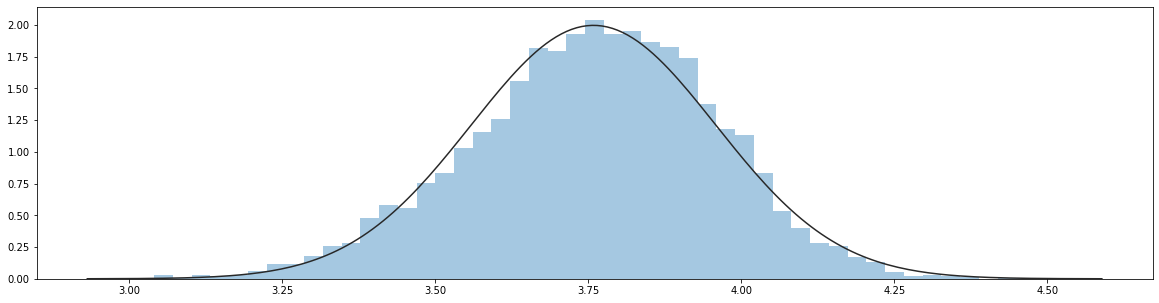

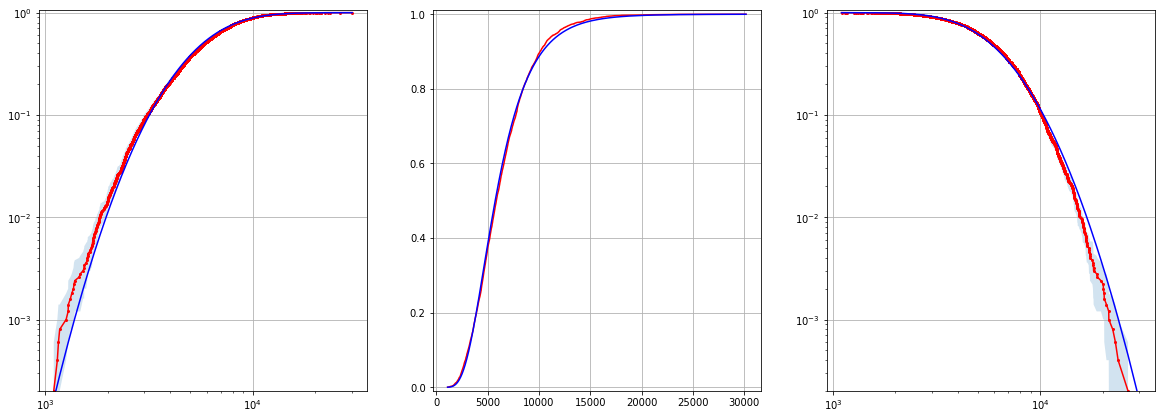



************************************************************************
2 : ../../experiments/csvs_probSAT/gen_n50_m213_k3SAT_seed3184935164.csv
************************************************************************
lognormal parameters: sigma 0.3950873945582421, mu 6.871028024380945, location 218.49107306854637


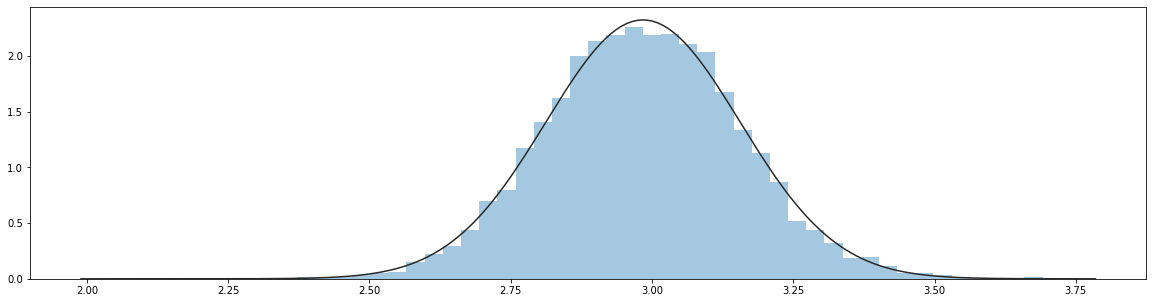

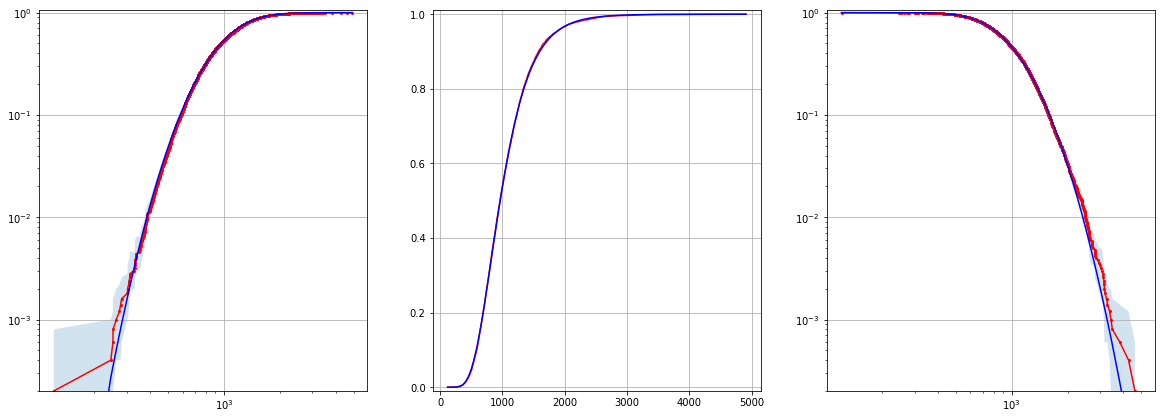



************************************************************************
3 : ../../experiments/csvs_probSAT/gen_n50_m213_k3SAT_seed3163119786.csv
************************************************************************
lognormal parameters: sigma 0.1838422164423623, mu 5.961998209801066, location 5.003605723653933e-06


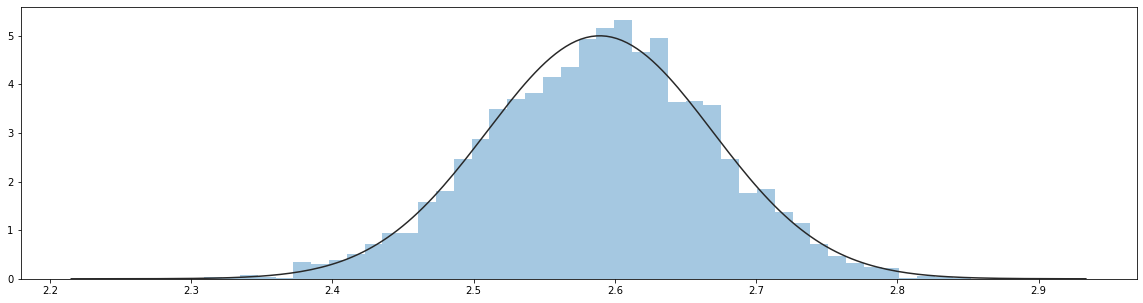

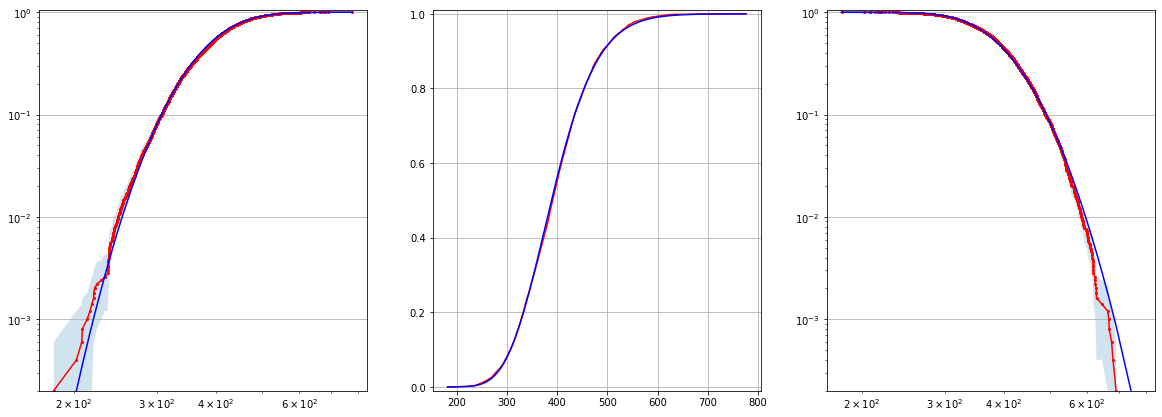



************************************************************************
4 : ../../experiments/csvs_probSAT/gen_n50_m213_k3SAT_seed2746317214.csv
************************************************************************
lognormal parameters: sigma 0.12803368601116175, mu 5.399392897083078, location 5.96781240736849e-06


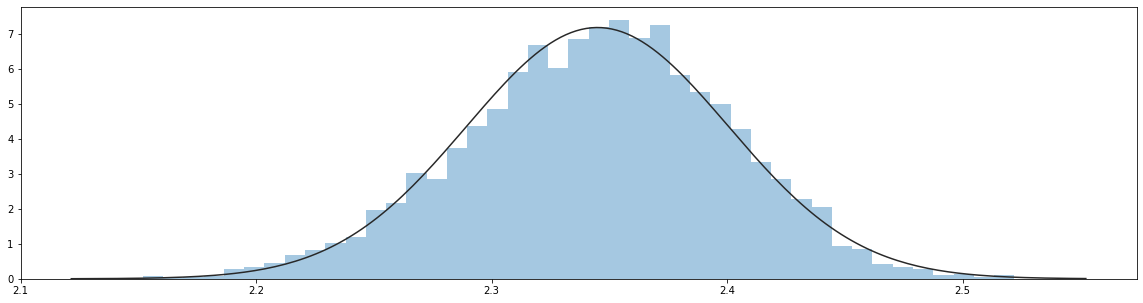

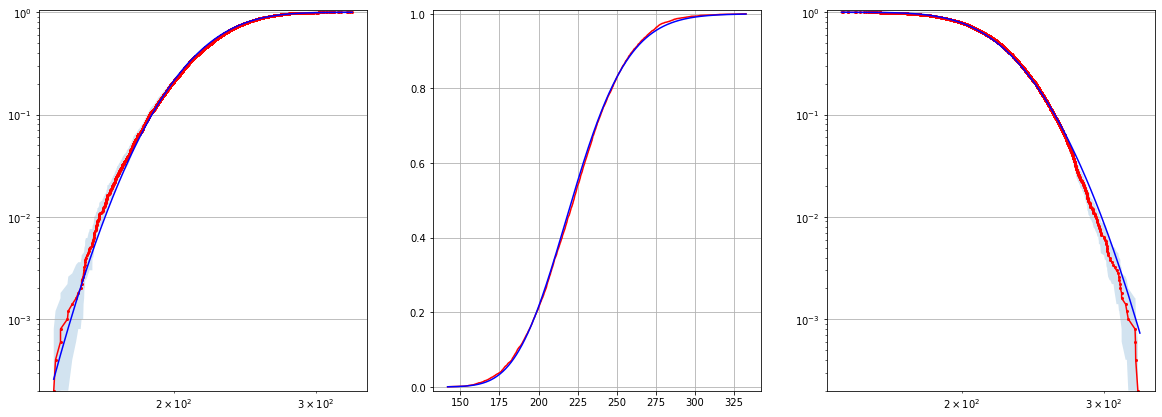



***********************************************************************
5 : ../../experiments/csvs_probSAT/gen_n50_m213_k3SAT_seed440213416.csv
***********************************************************************
lognormal parameters: sigma 0.584900885168094, mu 8.776177848777747, location 878.9187793787635


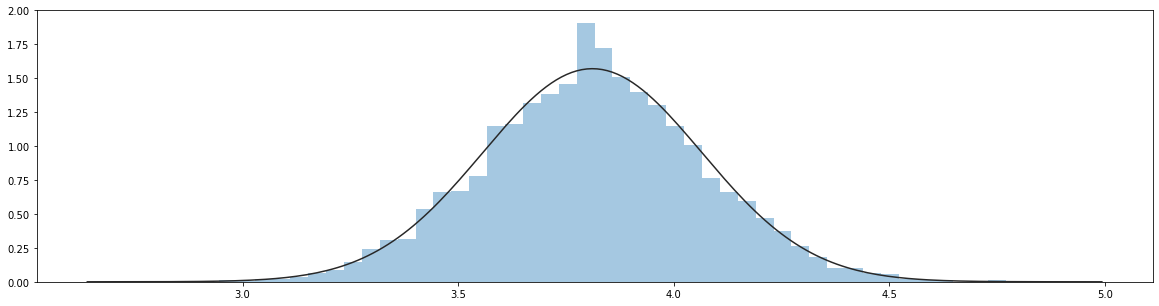

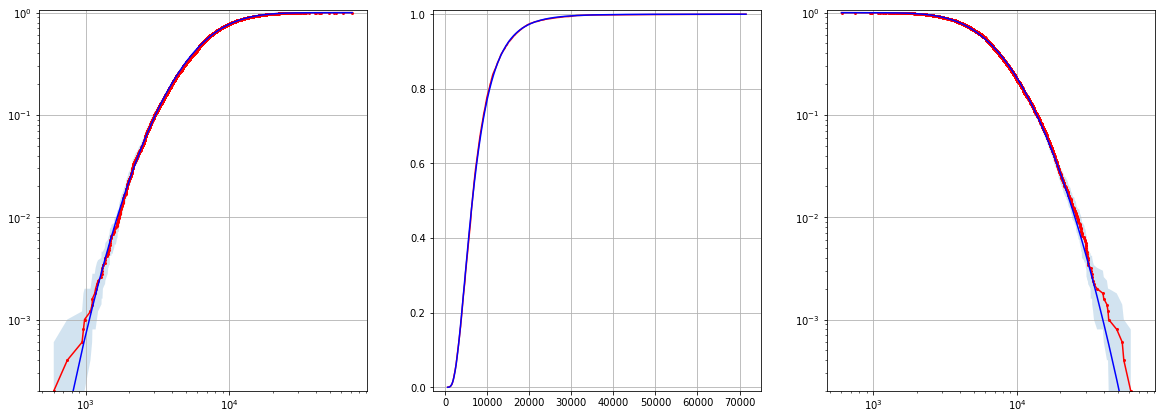



***********************************************************************
6 : ../../experiments/csvs_probSAT/gen_n50_m213_k3SAT_seed478163328.csv
***********************************************************************
lognormal parameters: sigma 0.12948920469506472, mu 5.512934098795791, location 6.176515058697716e-06


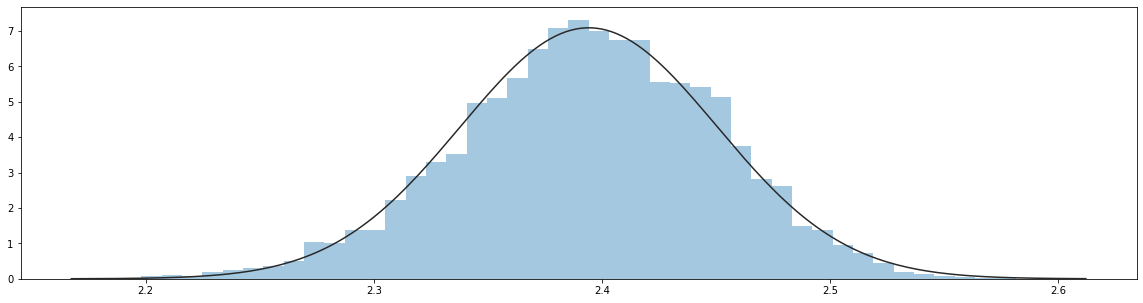

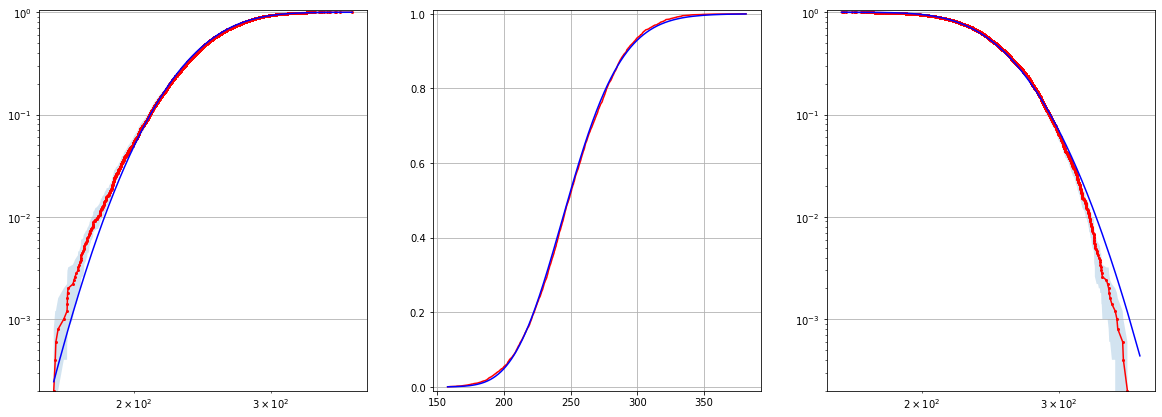



************************************************************************
7 : ../../experiments/csvs_probSAT/gen_n50_m213_k3SAT_seed1051802513.csv
************************************************************************
lognormal parameters: sigma 0.23958879022866525, mu 5.960619524730683, location 47.023698724871196


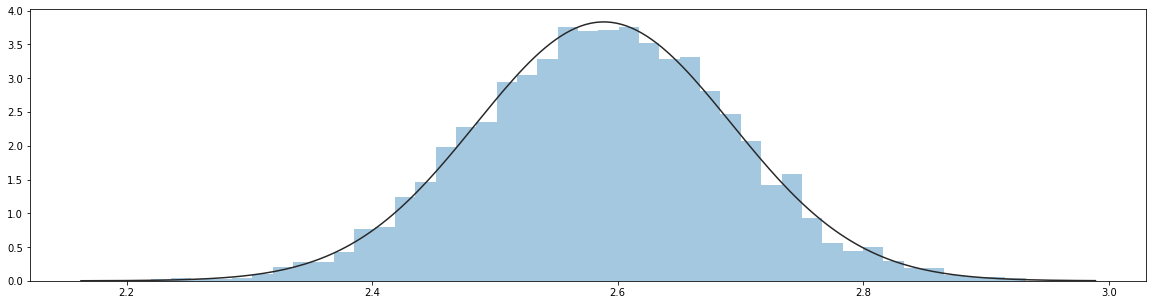

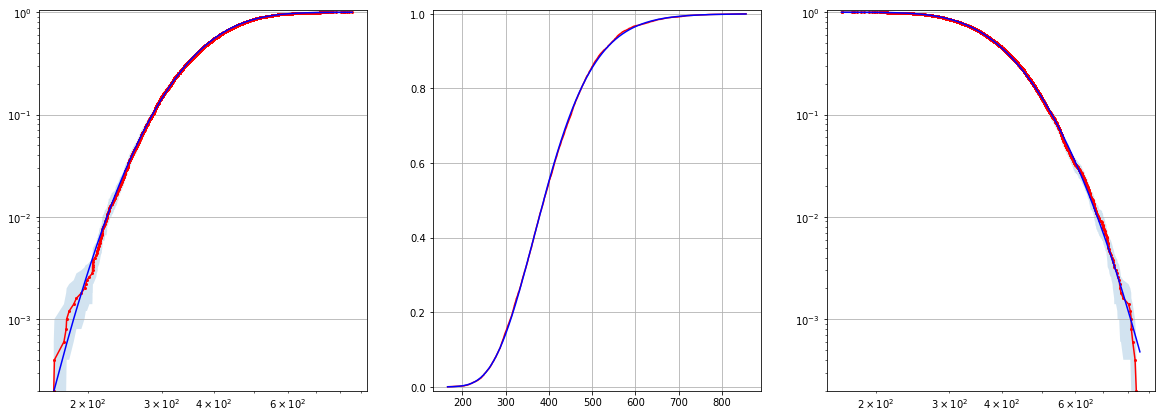



***********************************************************************
8 : ../../experiments/csvs_probSAT/gen_n50_m213_k3SAT_seed107420370.csv
***********************************************************************
lognormal parameters: sigma 0.17873473328192804, mu 6.479940062779797, location 5.856507992878976e-06


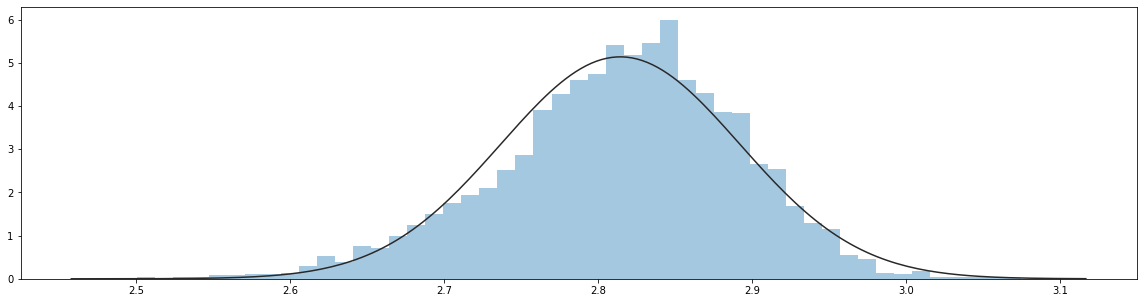

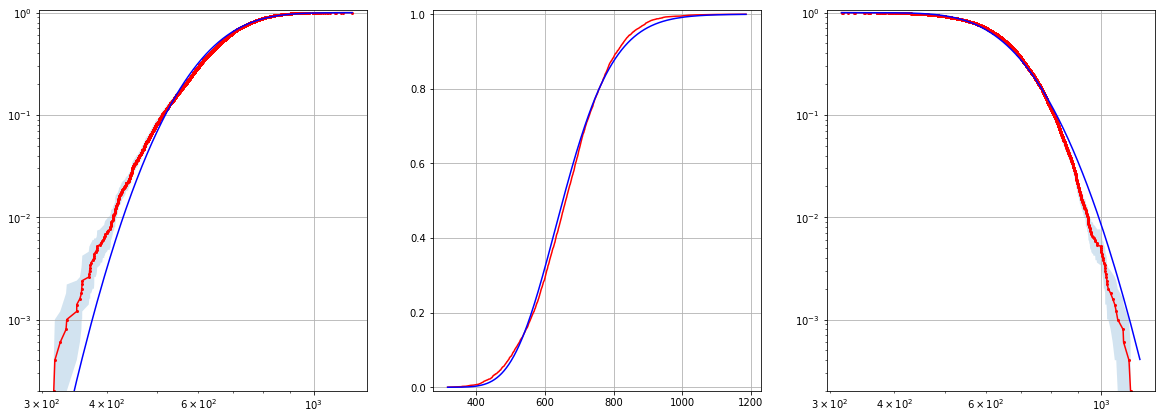



***********************************************************************
9 : ../../experiments/csvs_probSAT/gen_n50_m213_k3SAT_seed599310826.csv
***********************************************************************
lognormal parameters: sigma 0.1517908478644943, mu 4.547799750978945, location 29.49625440881283


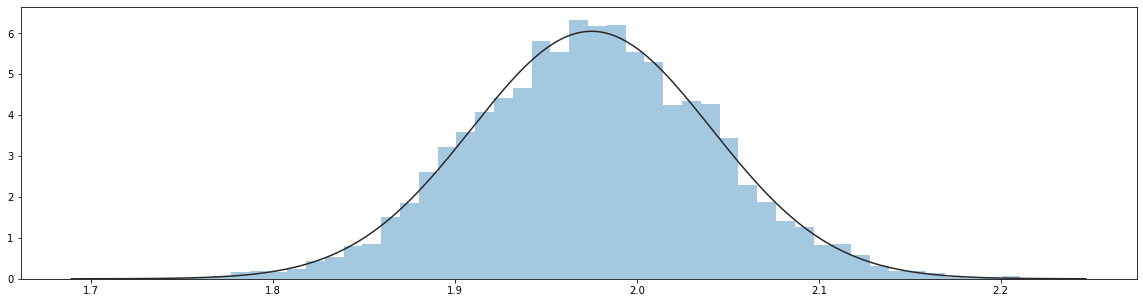

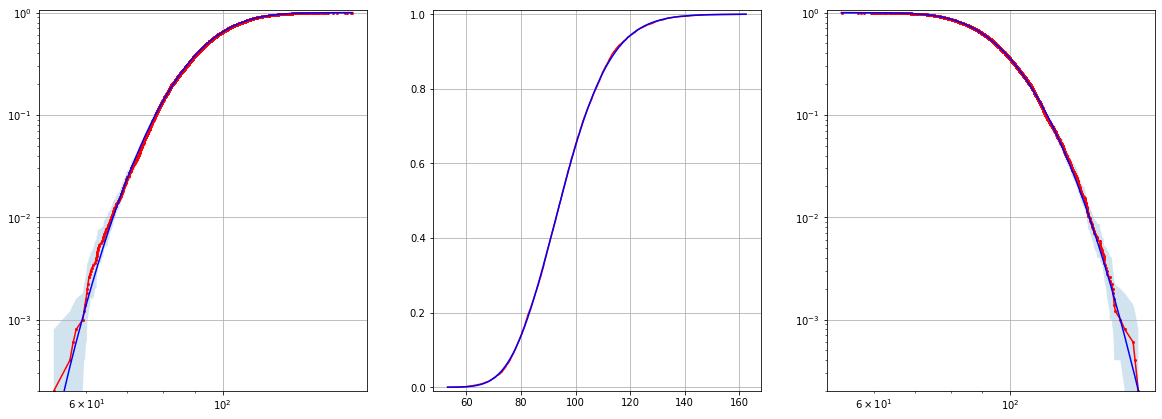



*************************************************************************
10 : ../../experiments/csvs_probSAT/gen_n100_m427_k3SAT_seed136505588.csv
*************************************************************************
lognormal parameters: sigma 0.15307052112415176, mu 7.217468856556952, location 5.74541310239029e-06


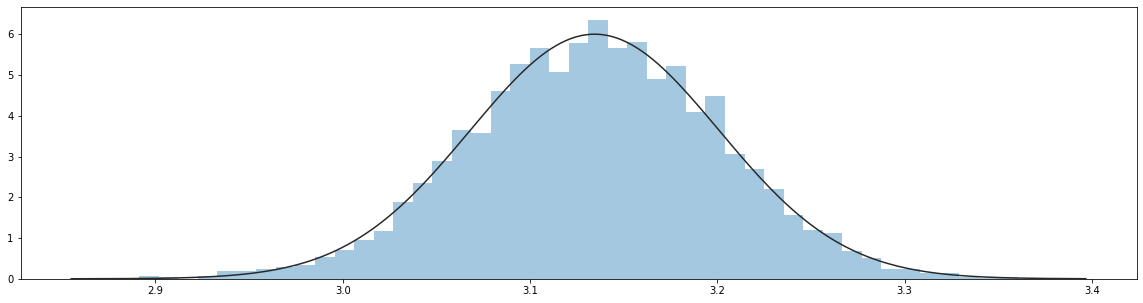

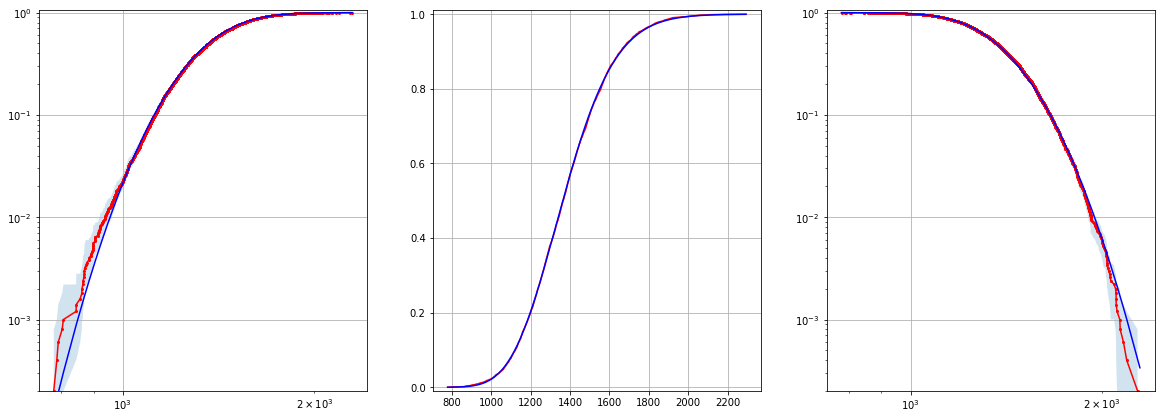



**************************************************************************
11 : ../../experiments/csvs_probSAT/gen_n100_m427_k3SAT_seed2342331445.csv
**************************************************************************
lognormal parameters: sigma 0.40080056485205284, mu 8.596216063925915, location 1328.0898040532418


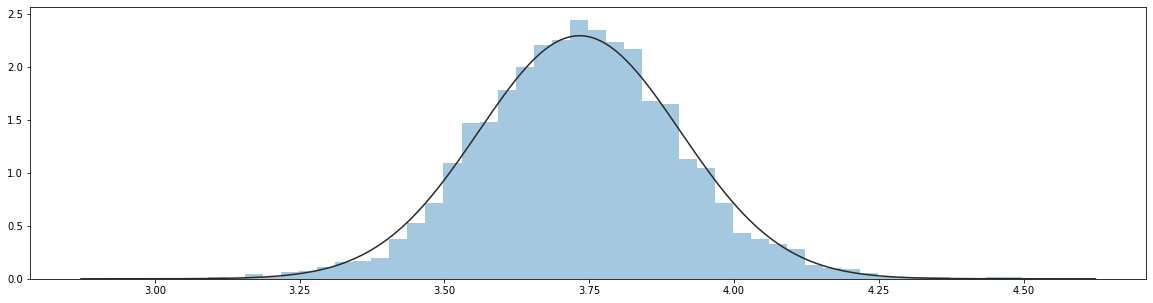

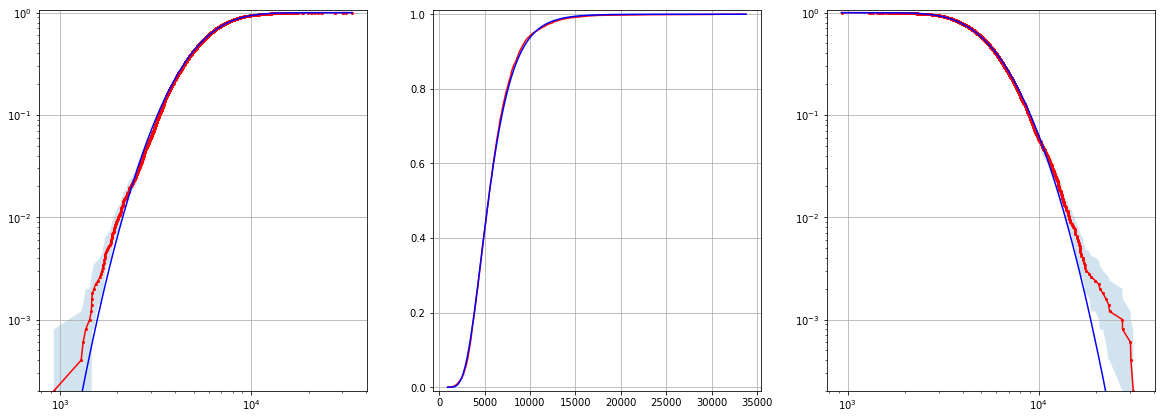



**************************************************************************
12 : ../../experiments/csvs_probSAT/gen_n100_m427_k3SAT_seed1812140442.csv
**************************************************************************
lognormal parameters: sigma 0.0930722872433542, mu 6.50040233798877, location 3.4181337599998954e-06


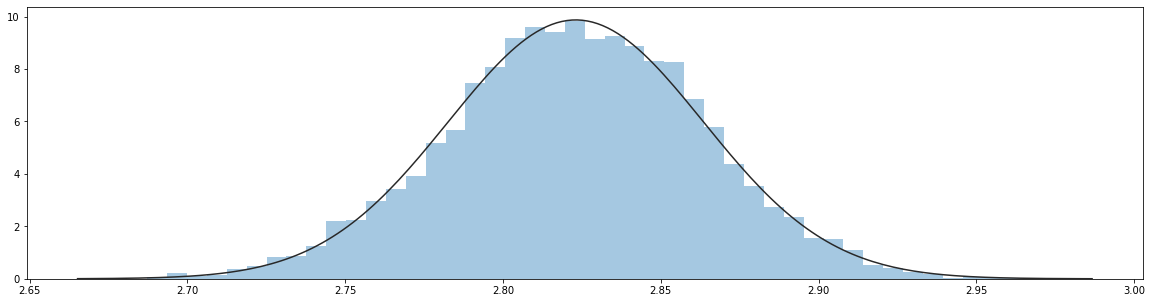

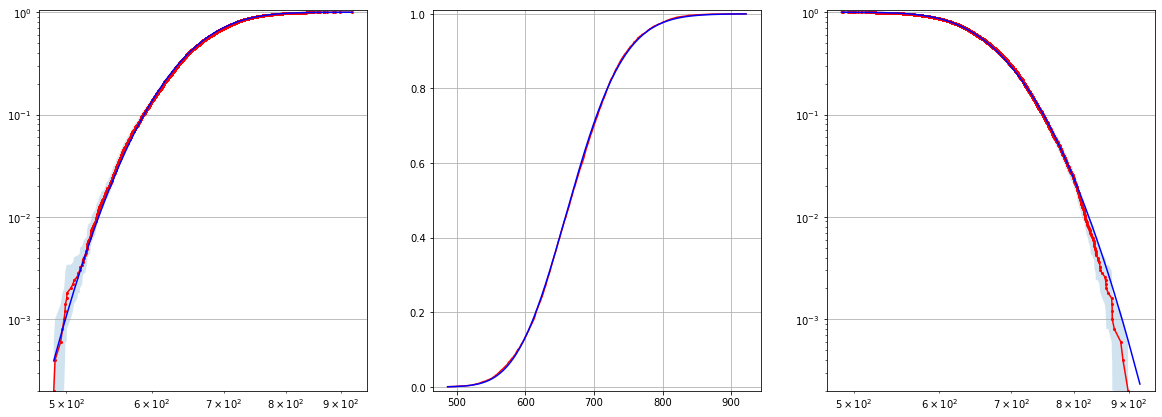



**************************************************************************
13 : ../../experiments/csvs_probSAT/gen_n100_m427_k3SAT_seed2906402158.csv
**************************************************************************
lognormal parameters: sigma 0.14134923497174845, mu 6.252577300502311, location 92.47307813397511


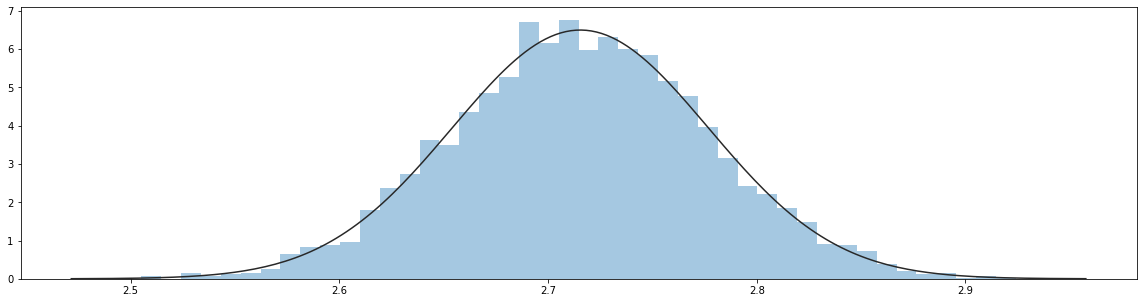

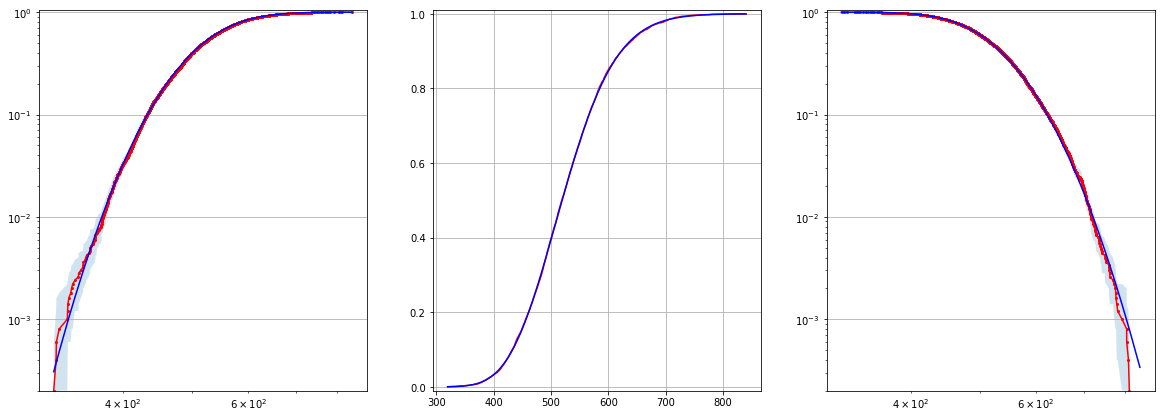



*************************************************************************
14 : ../../experiments/csvs_probSAT/gen_n100_m427_k3SAT_seed402418011.csv
*************************************************************************
lognormal parameters: sigma 0.20167803643930865, mu 9.1186171294726, location 3117.2275430513287


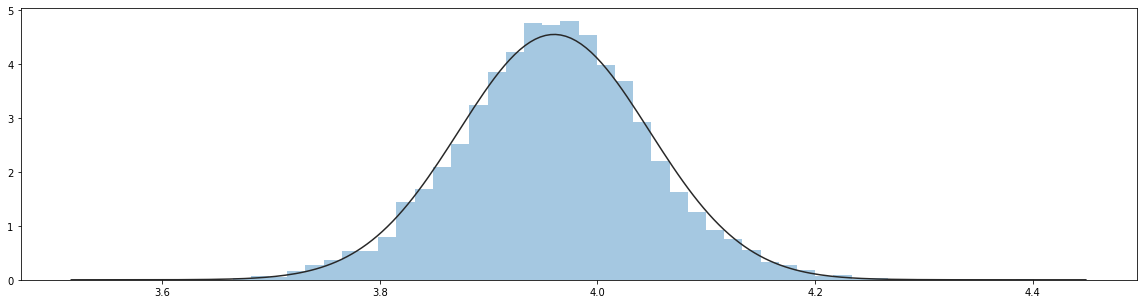

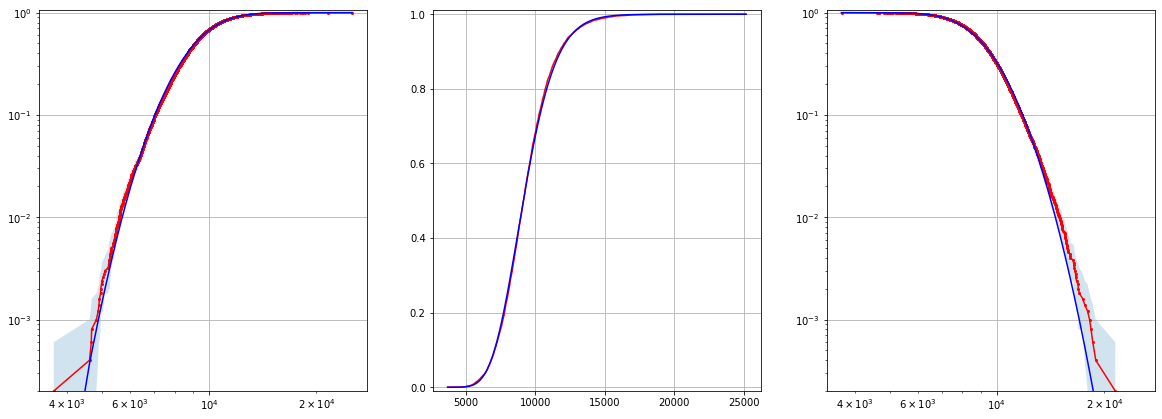



**************************************************************************
15 : ../../experiments/csvs_probSAT/gen_n100_m427_k3SAT_seed3831882065.csv
**************************************************************************
lognormal parameters: sigma 0.5249386586201409, mu 8.30109104845138, location 787.0160510728671


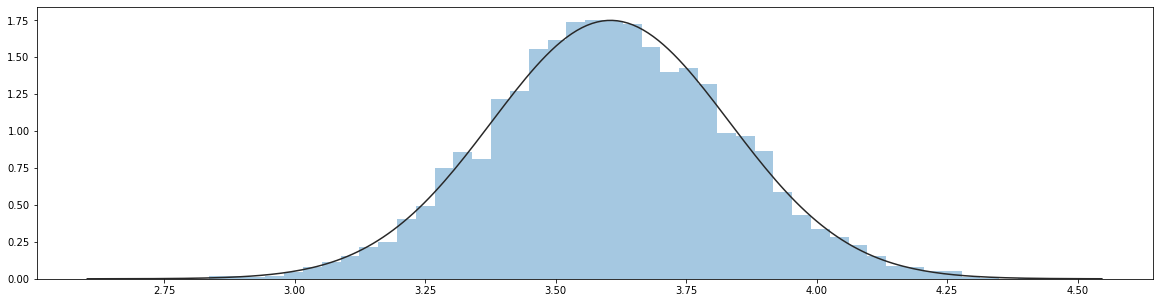

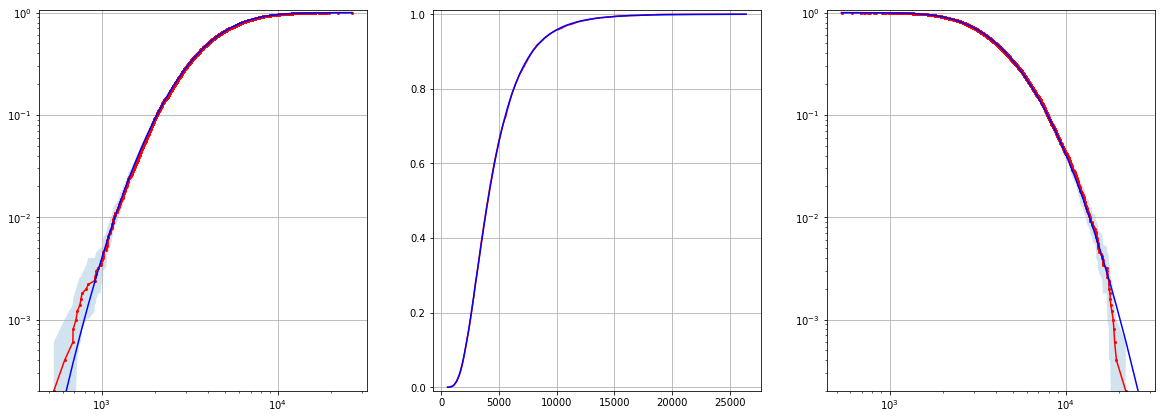



**************************************************************************
16 : ../../experiments/csvs_probSAT/gen_n100_m427_k3SAT_seed3181143732.csv
**************************************************************************
lognormal parameters: sigma 0.10588749376308018, mu 6.349509096636764, location 5.546853737003423e-06


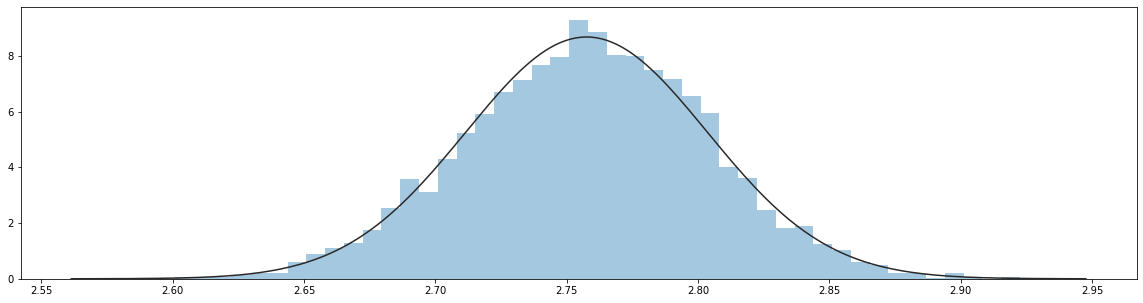

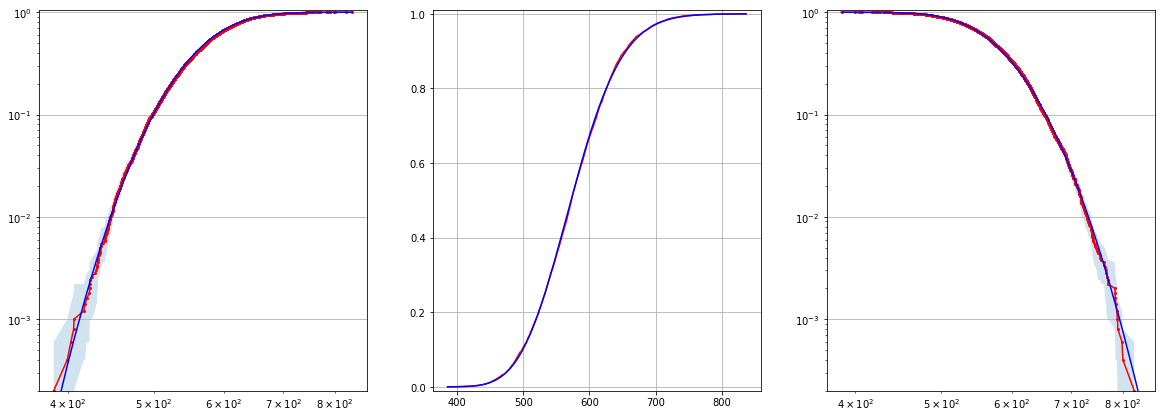



*************************************************************************
17 : ../../experiments/csvs_probSAT/gen_n100_m427_k3SAT_seed373399427.csv
*************************************************************************
lognormal parameters: sigma 0.17228199718177026, mu 8.29292901322145, location 1224.4766098595244


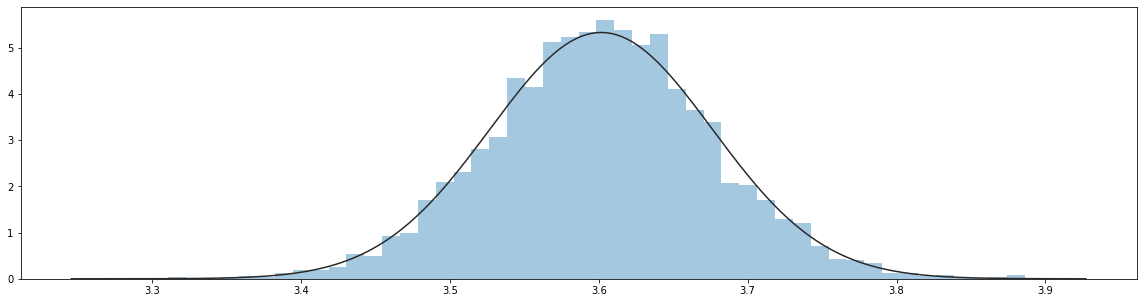

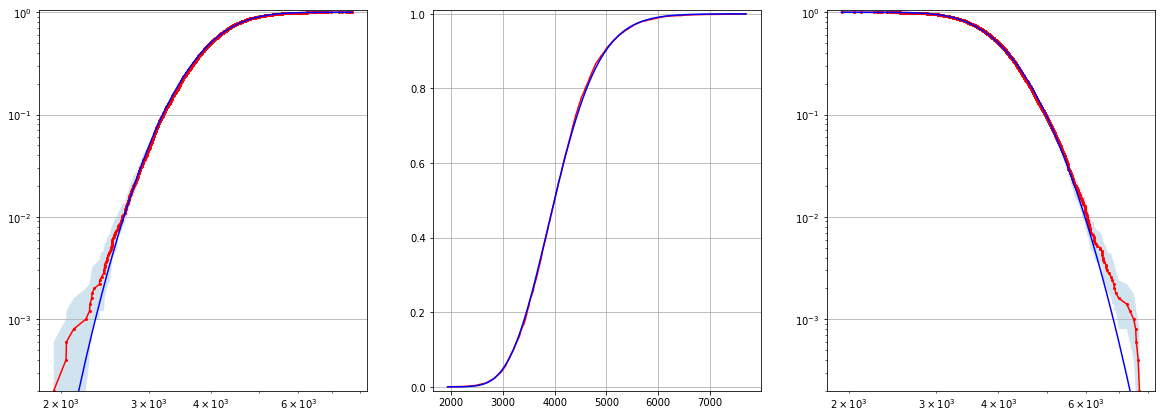



*************************************************************************
18 : ../../experiments/csvs_probSAT/gen_n100_m427_k3SAT_seed127978095.csv
*************************************************************************
lognormal parameters: sigma 0.3221132993754115, mu 8.097477512145689, location 3.6882746289507633e-06


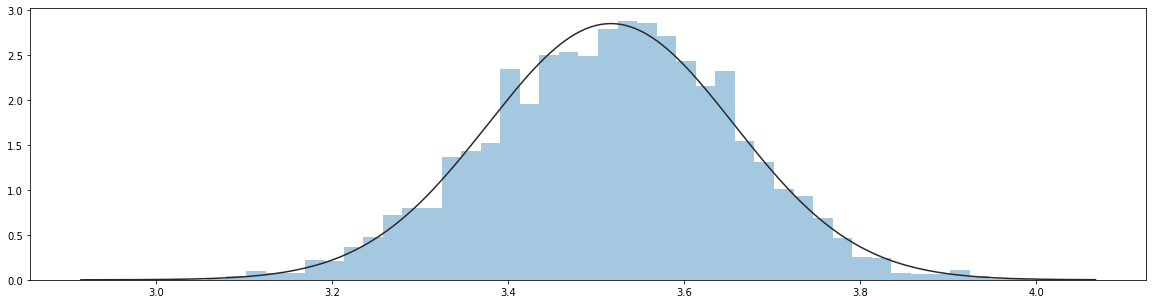

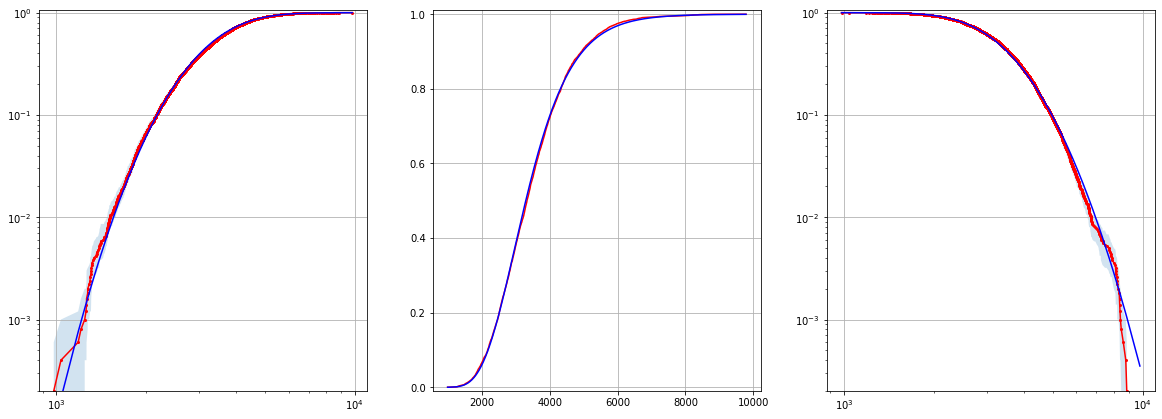



**************************************************************************
19 : ../../experiments/csvs_probSAT/gen_n100_m427_k3SAT_seed2536146026.csv
**************************************************************************
lognormal parameters: sigma 0.3286496552170788, mu 7.5617383492057355, location 499.130749881396


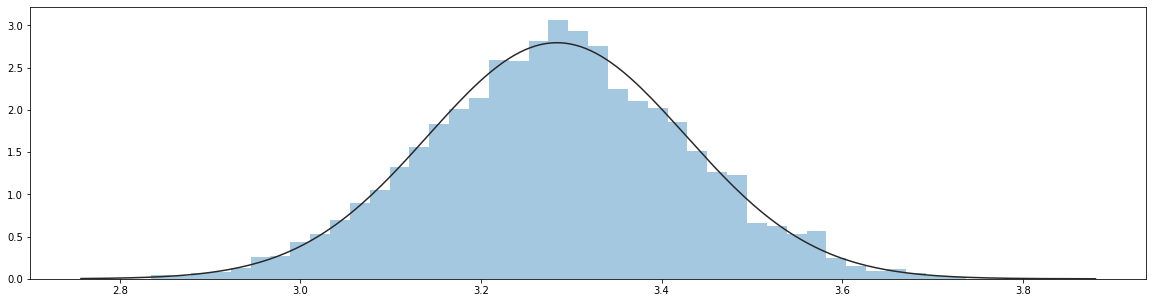

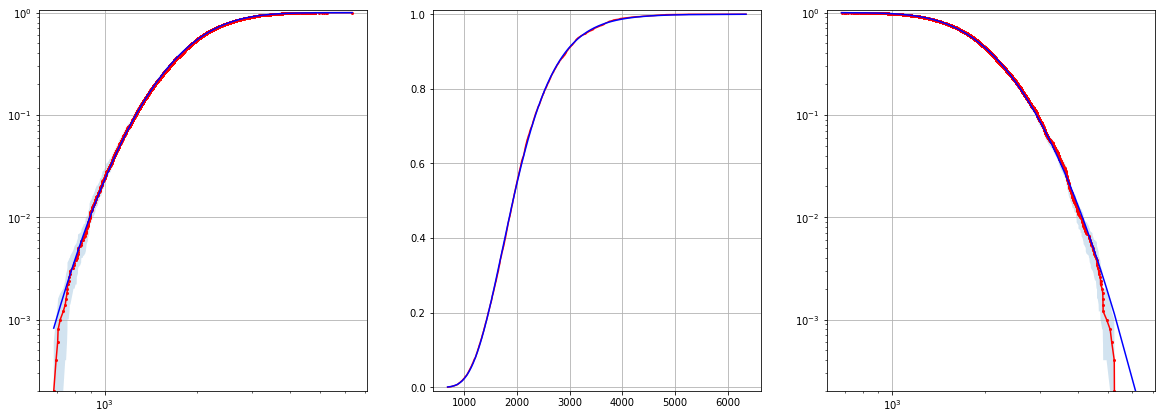



*************************************************************************
20 : ../../experiments/csvs_probSAT/gen_n150_m640_k3SAT_seed113971124.csv
*************************************************************************
lognormal parameters: sigma 0.15739508194982926, mu 8.20394492856154, location 1615.3729284456604


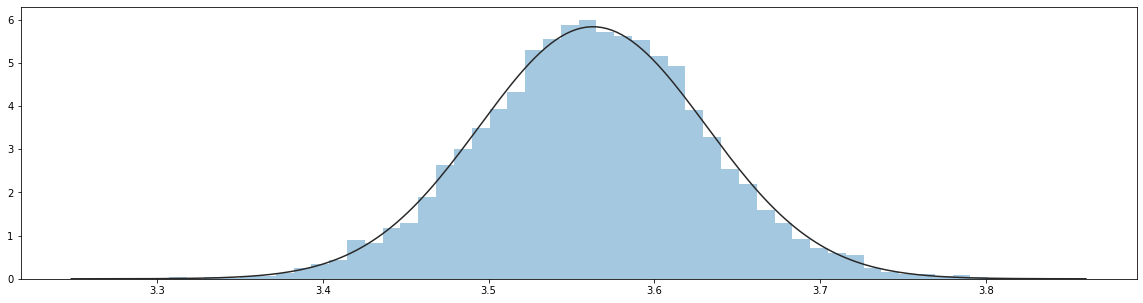

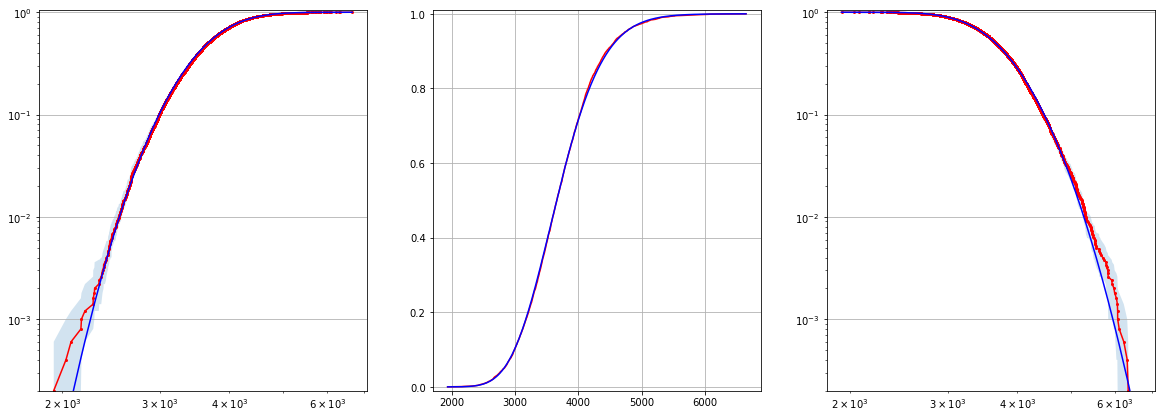



**************************************************************************
21 : ../../experiments/csvs_probSAT/gen_n150_m640_k3SAT_seed2791232394.csv
**************************************************************************
lognormal parameters: sigma 0.13883165540907338, mu 7.807449590738396, location 597.7344054769089


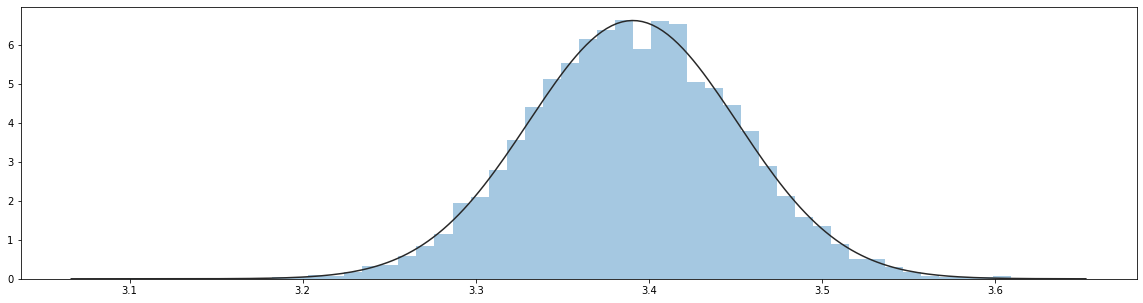

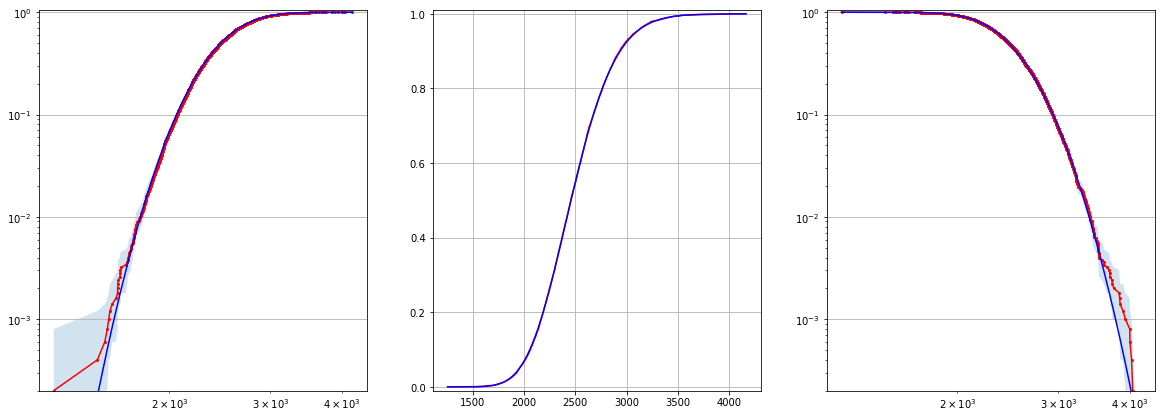



**************************************************************************
22 : ../../experiments/csvs_probSAT/gen_n150_m640_k3SAT_seed3012167821.csv
**************************************************************************
lognormal parameters: sigma 0.14923741687380407, mu 8.885791729745216, location 1675.0474036542212


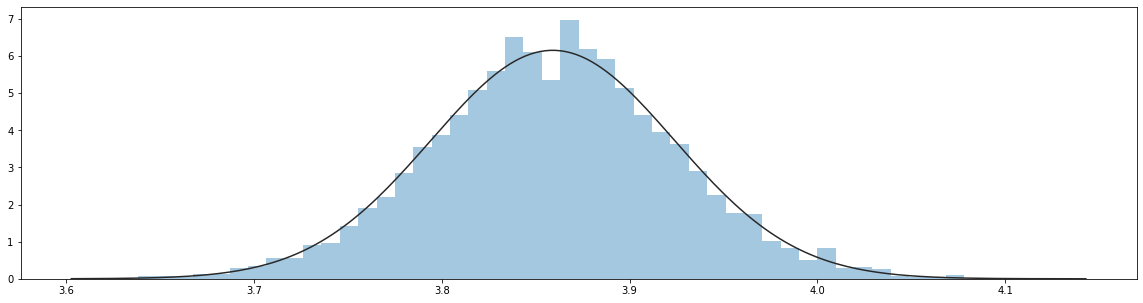

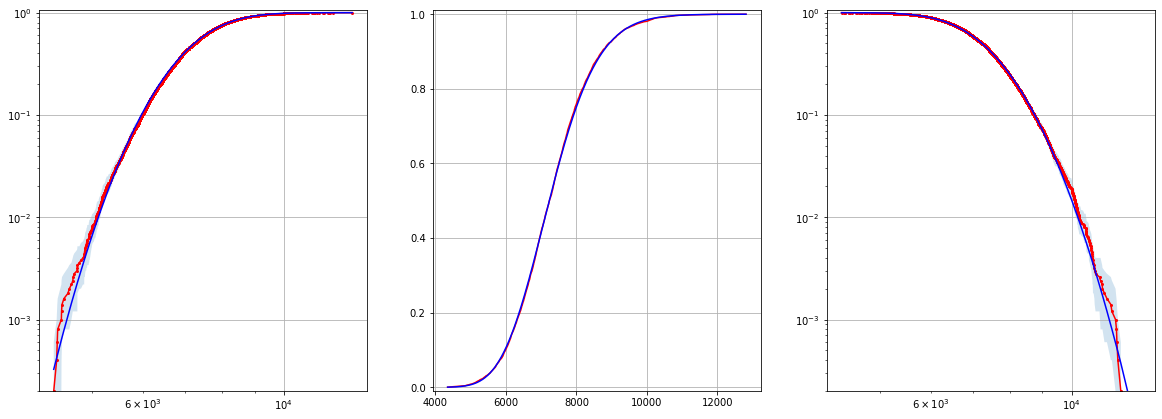



**************************************************************************
23 : ../../experiments/csvs_probSAT/gen_n150_m640_k3SAT_seed3075280818.csv
**************************************************************************
lognormal parameters: sigma 0.10994485013374586, mu 7.927927180398835, location 413.56934210136114


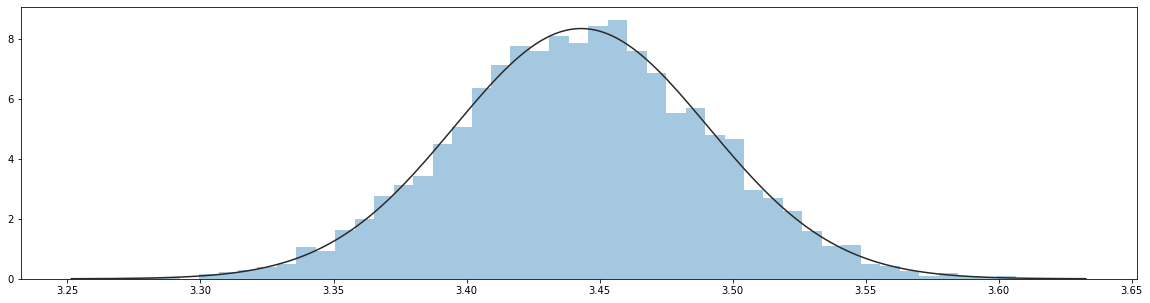

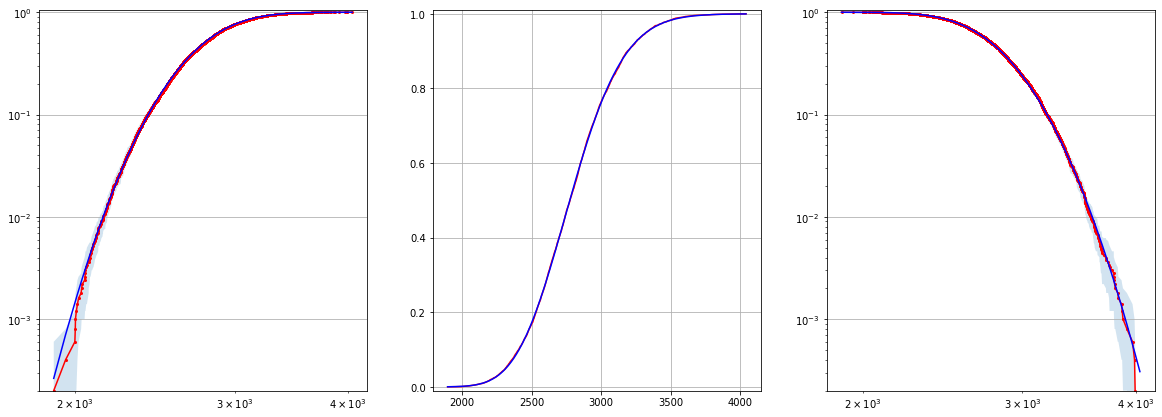



*************************************************************************
24 : ../../experiments/csvs_probSAT/gen_n150_m640_k3SAT_seed999270937.csv
*************************************************************************
lognormal parameters: sigma 0.31516201257884324, mu 15.44437438039207, location 555712.2414821369


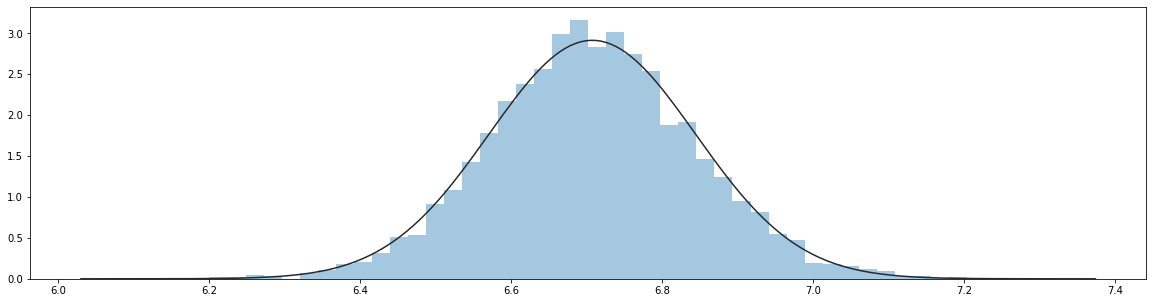

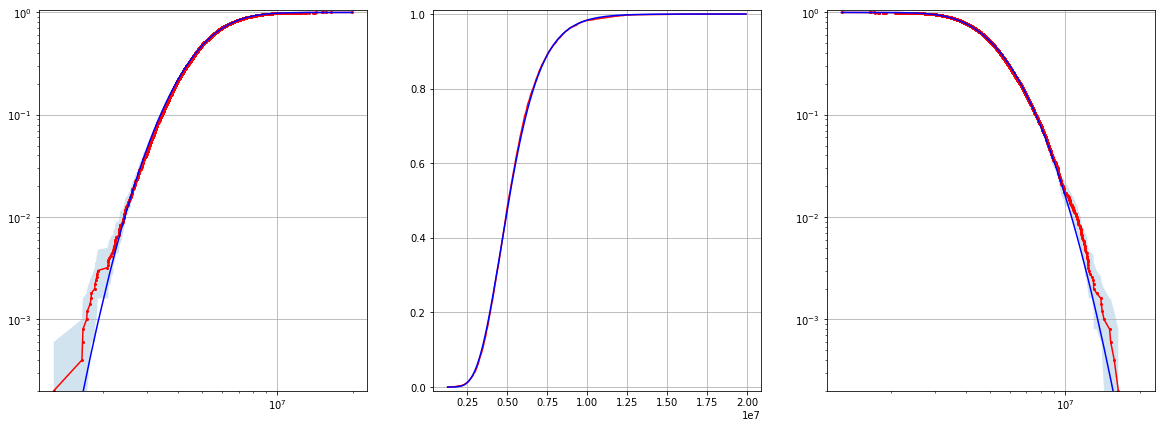



*************************************************************************
25 : ../../experiments/csvs_probSAT/gen_n150_m640_k3SAT_seed939042956.csv
*************************************************************************
lognormal parameters: sigma 0.1877349628983947, mu 8.8606188166673, location 1114.3098344159384


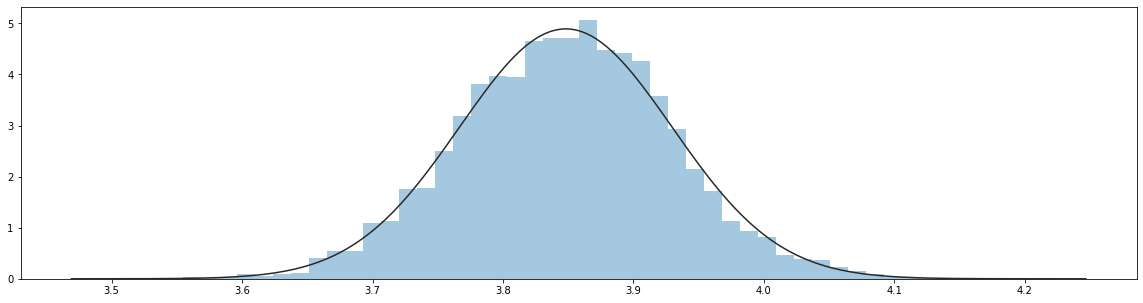

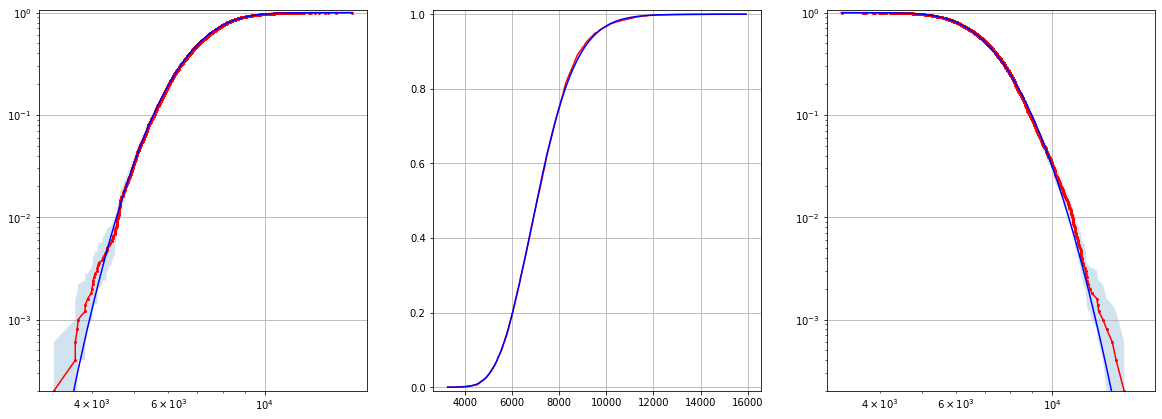



**************************************************************************
26 : ../../experiments/csvs_probSAT/gen_n150_m640_k3SAT_seed2170484434.csv
**************************************************************************
lognormal parameters: sigma 0.1313847991982369, mu 8.056462413430916, location 693.1249985926196


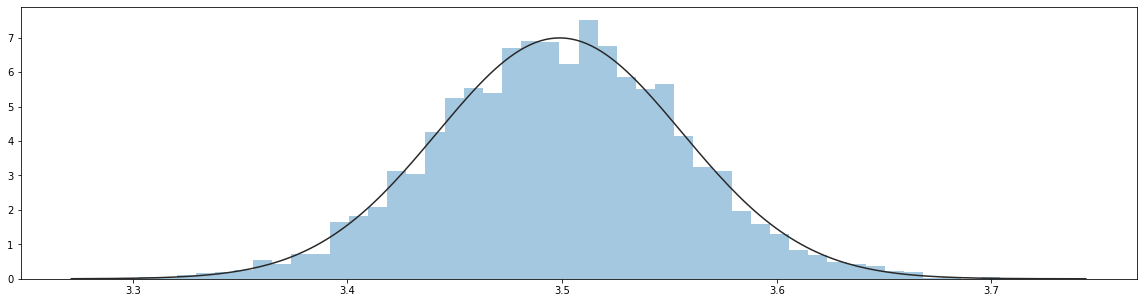

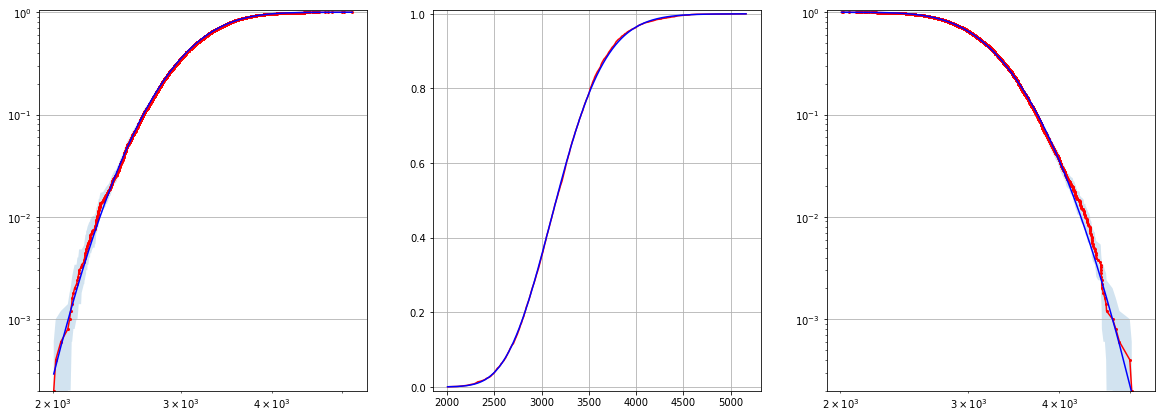



*************************************************************************
27 : ../../experiments/csvs_probSAT/gen_n150_m640_k3SAT_seed854001194.csv
*************************************************************************
lognormal parameters: sigma 0.10837207488496708, mu 7.483035575569456, location 357.9004792085398


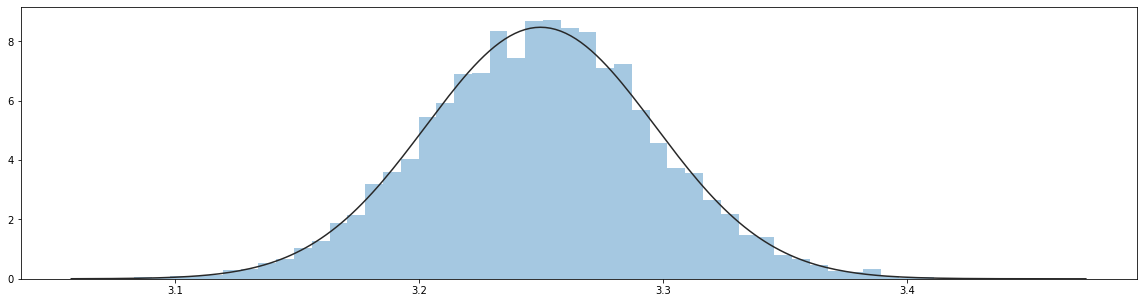

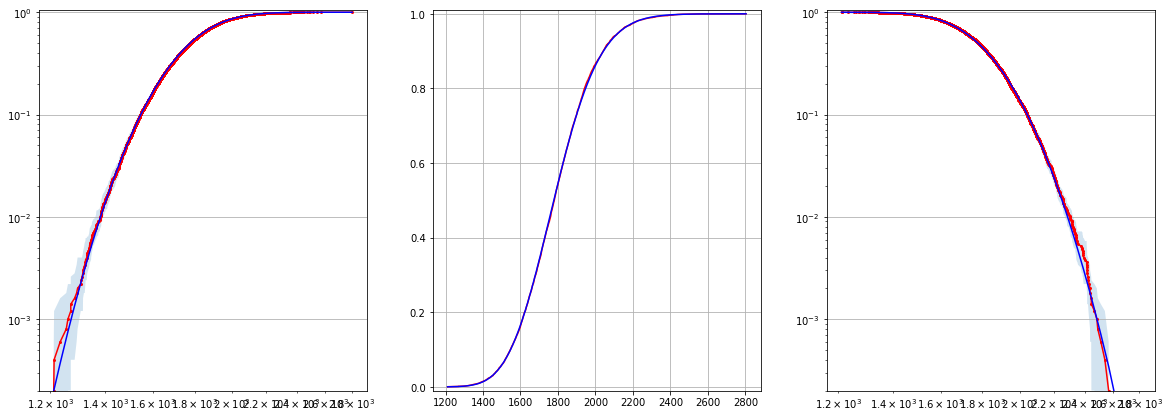



**************************************************************************
28 : ../../experiments/csvs_probSAT/gen_n150_m640_k3SAT_seed2410529191.csv
**************************************************************************
lognormal parameters: sigma 0.10429508807428944, mu 7.610276565693636, location 207.6715862362862


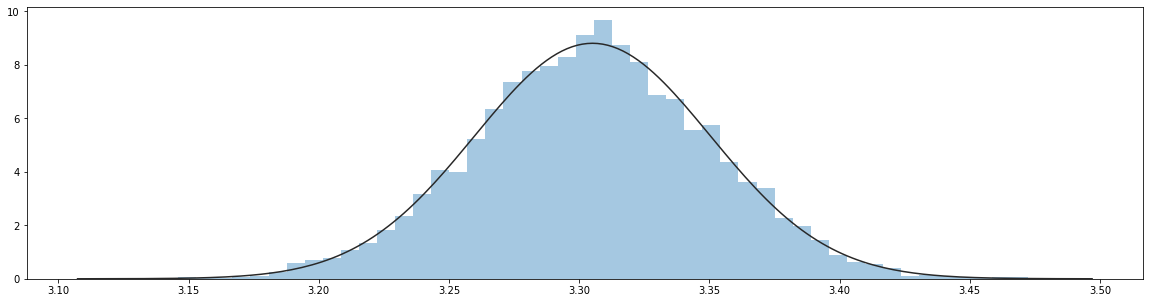

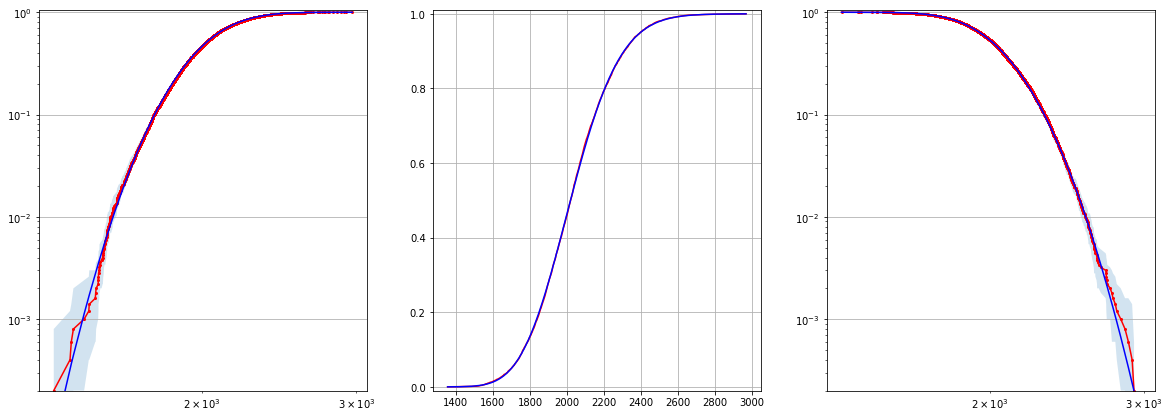



**************************************************************************
29 : ../../experiments/csvs_probSAT/gen_n150_m640_k3SAT_seed2585650757.csv
**************************************************************************
lognormal parameters: sigma 0.2814359472402677, mu 9.873292663808758, location 7388.335298587475


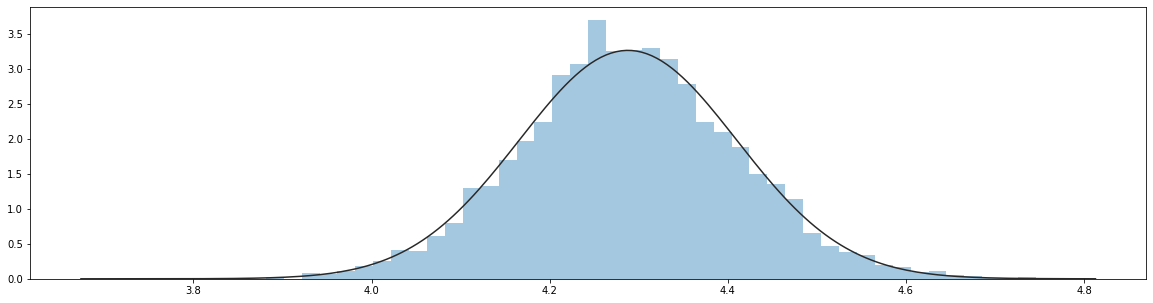

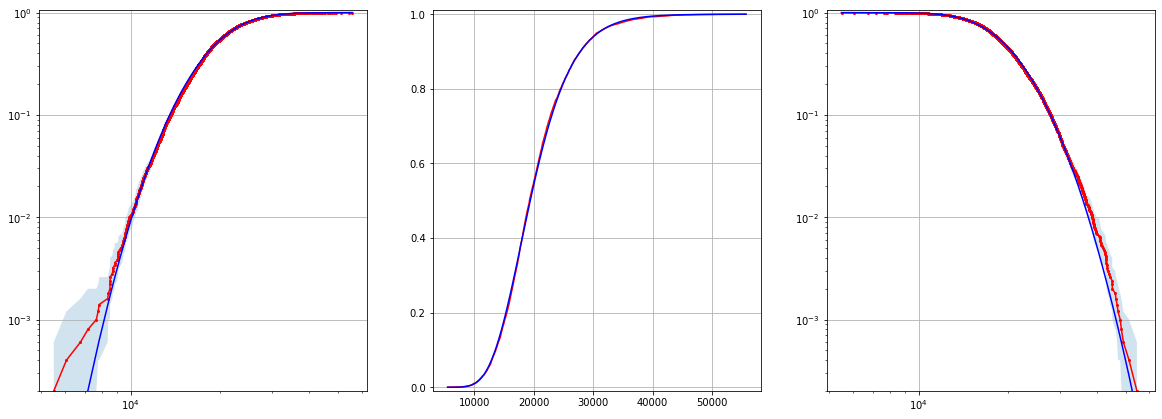



**************************************************************************
30 : ../../experiments/csvs_probSAT/gen_n200_m853_k3SAT_seed2530876845.csv
**************************************************************************
lognormal parameters: sigma 0.2329688633375695, mu 10.358584511681507, location 9256.976623468954


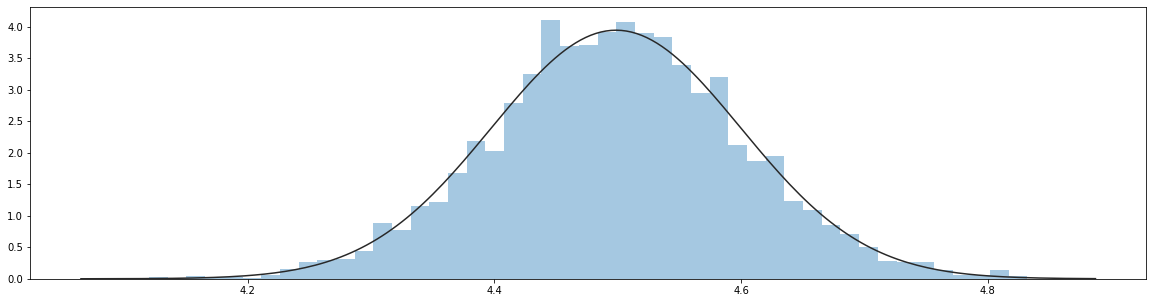

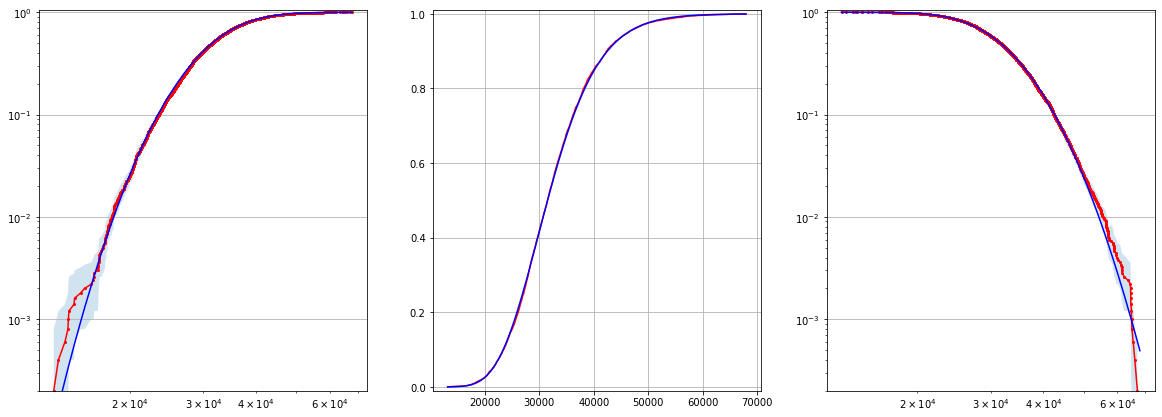



**************************************************************************
31 : ../../experiments/csvs_probSAT/gen_n200_m853_k3SAT_seed3259052812.csv
**************************************************************************
lognormal parameters: sigma 0.39622242899464843, mu 13.296780733505363, location 244016.67215810693


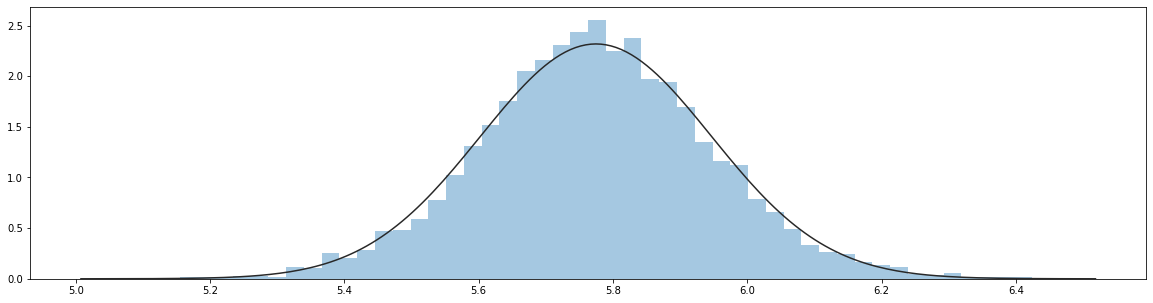

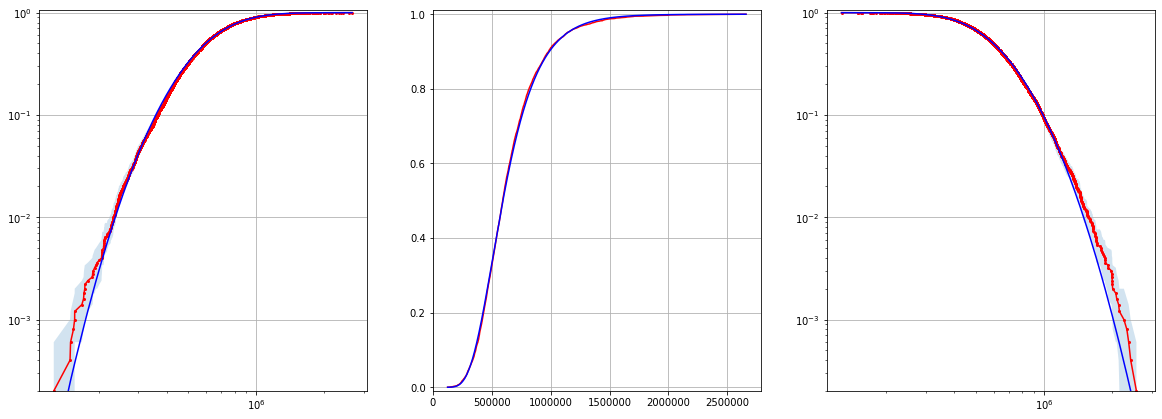



**************************************************************************
32 : ../../experiments/csvs_probSAT/gen_n200_m853_k3SAT_seed1194819985.csv
**************************************************************************
lognormal parameters: sigma 0.13960216269599082, mu 10.181202640454215, location 4.879493670784353e-06


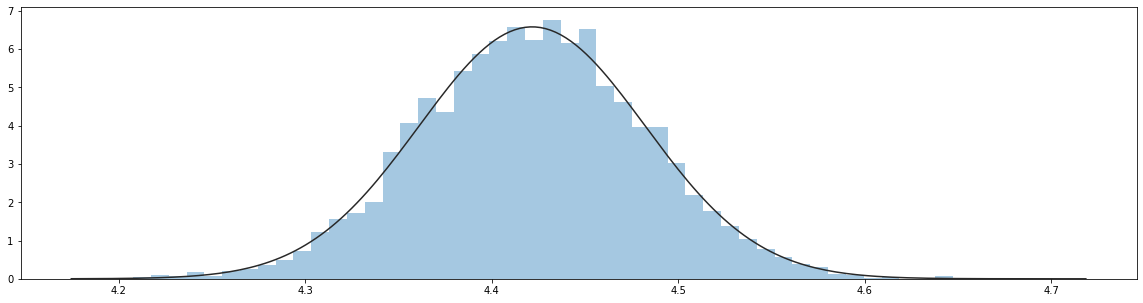

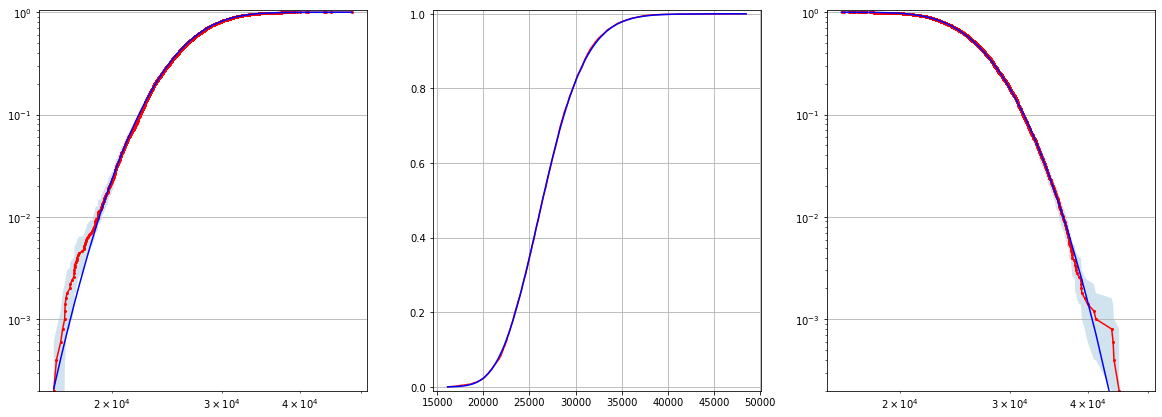



**************************************************************************
33 : ../../experiments/csvs_probSAT/gen_n200_m853_k3SAT_seed3476477324.csv
**************************************************************************
lognormal parameters: sigma 0.3297806627518436, mu 15.289876092308877, location 939838.9995636443


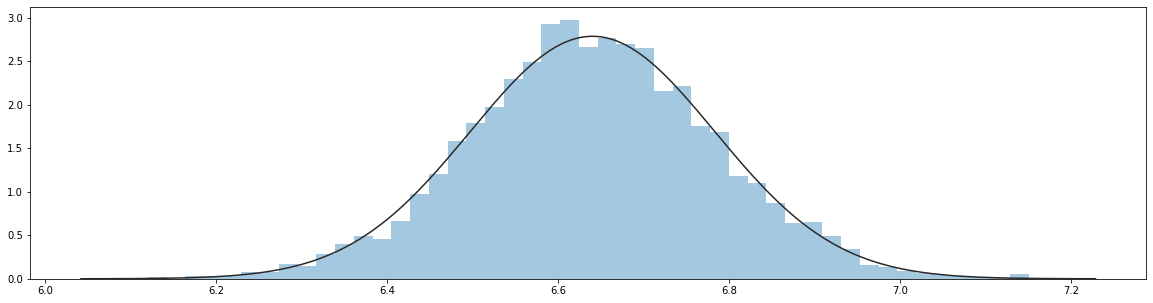

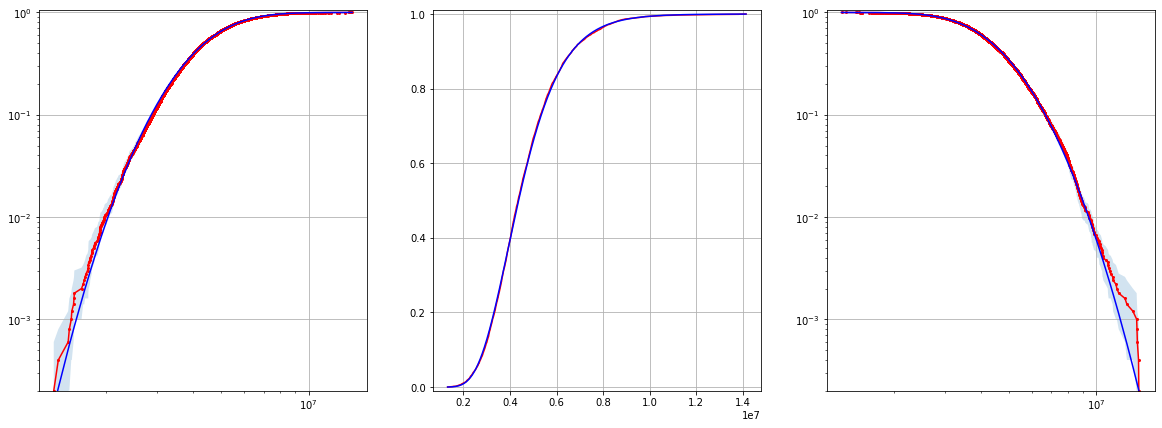



*************************************************************************
34 : ../../experiments/csvs_probSAT/gen_n200_m853_k3SAT_seed946785249.csv
*************************************************************************
lognormal parameters: sigma 0.18588497914323004, mu 9.335024148049804, location 4335.319725861768


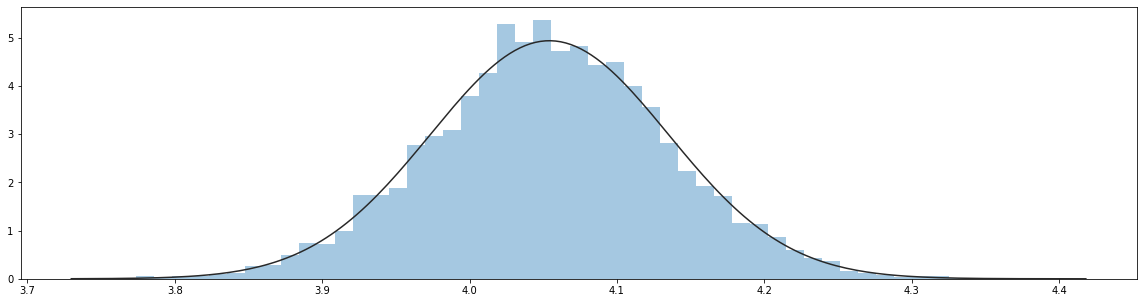

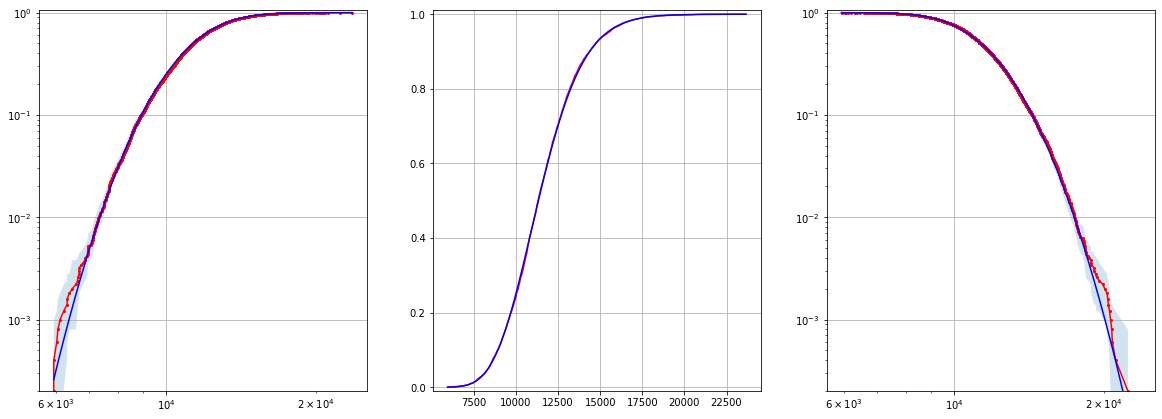



**************************************************************************
35 : ../../experiments/csvs_probSAT/gen_n200_m853_k3SAT_seed2340505847.csv
**************************************************************************
lognormal parameters: sigma 0.18004871704864628, mu 9.35481192634898, location 5545.582860639451


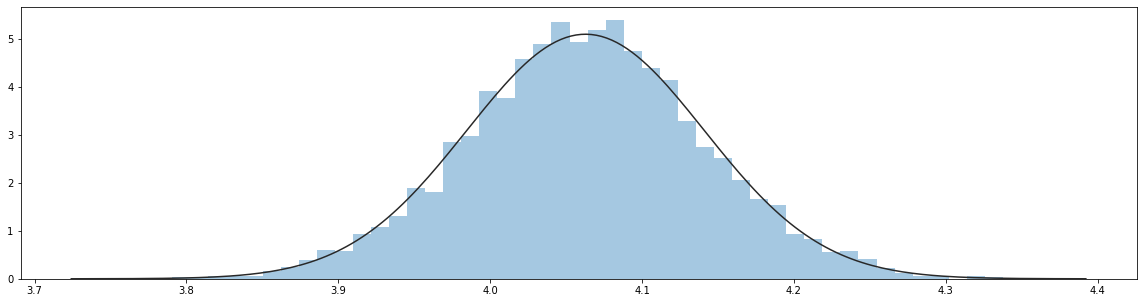

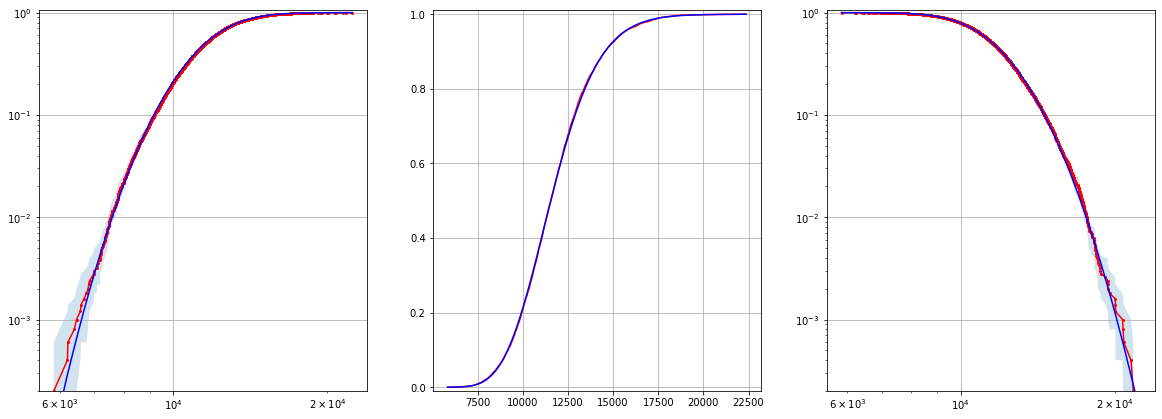



**************************************************************************
36 : ../../experiments/csvs_probSAT/gen_n200_m853_k3SAT_seed1801823909.csv
**************************************************************************
lognormal parameters: sigma 0.08599298239784839, mu 8.057922278992496, location 14.89673336820097


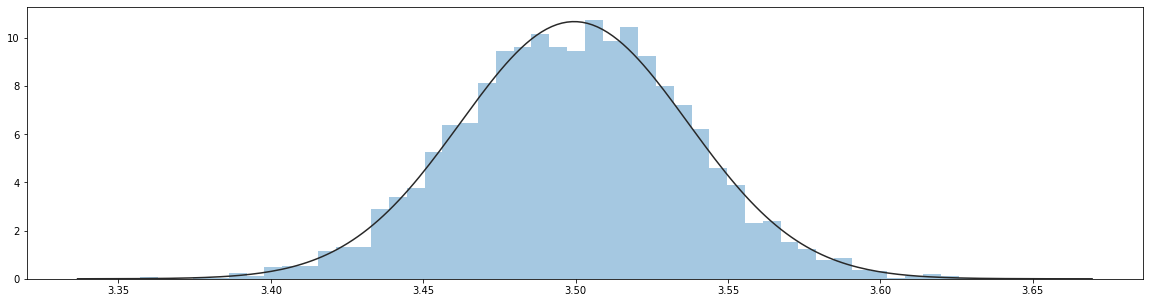

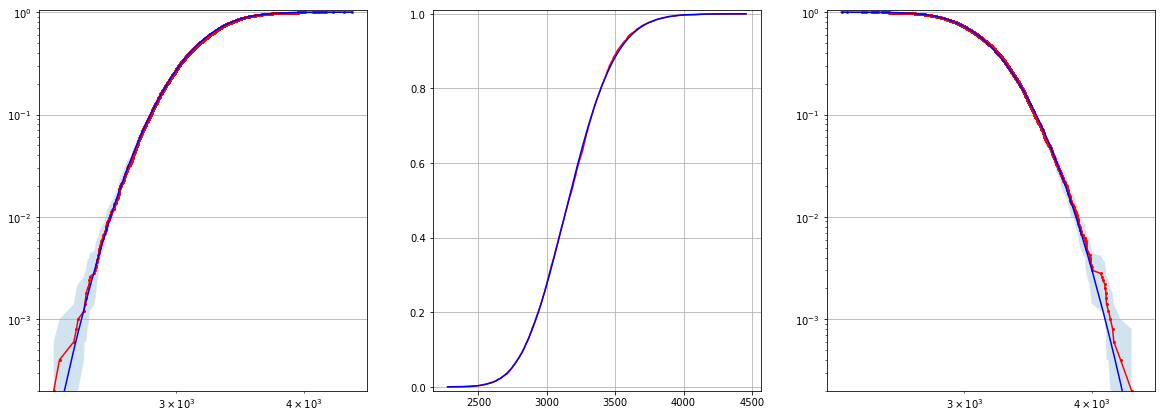



************************************************************************
37 : ../../experiments/csvs_probSAT/gen_n200_m853_k3SAT_seed27911968.csv
************************************************************************
lognormal parameters: sigma 0.0898905487062572, mu 8.667559613668121, location 5.921642041433161e-06


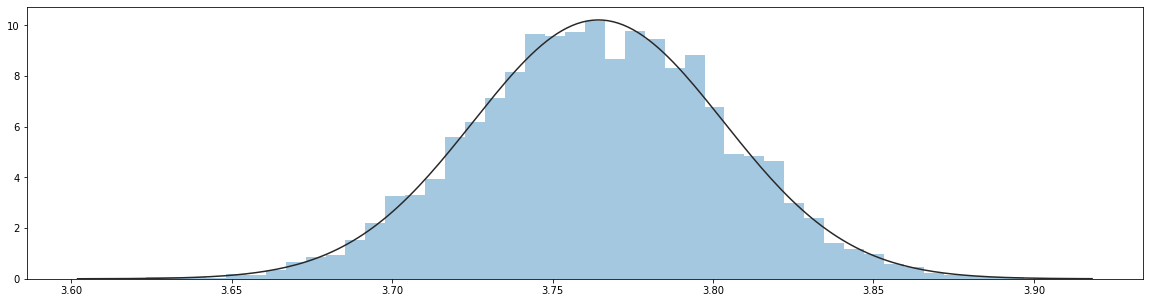

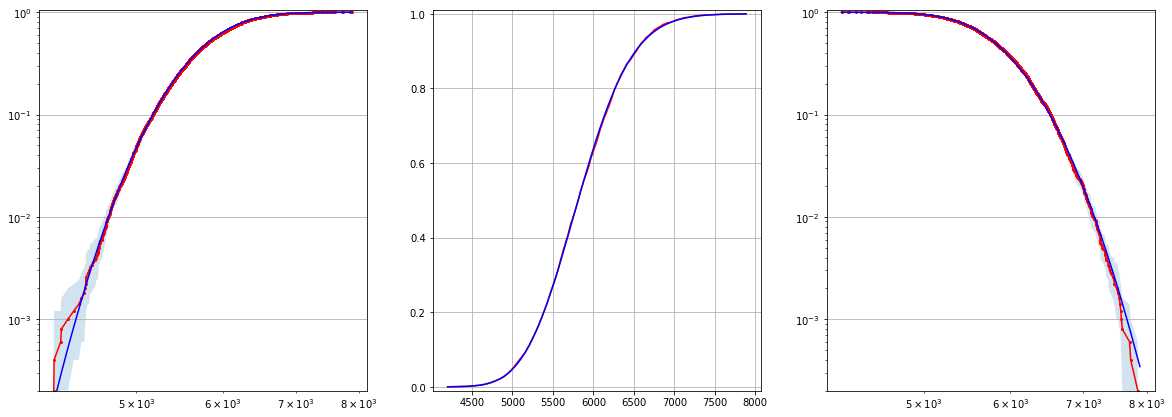



**************************************************************************
38 : ../../experiments/csvs_probSAT/gen_n200_m853_k3SAT_seed3733616460.csv
**************************************************************************
lognormal parameters: sigma 0.281307708897147, mu 11.75347047625183, location 41274.214166169884


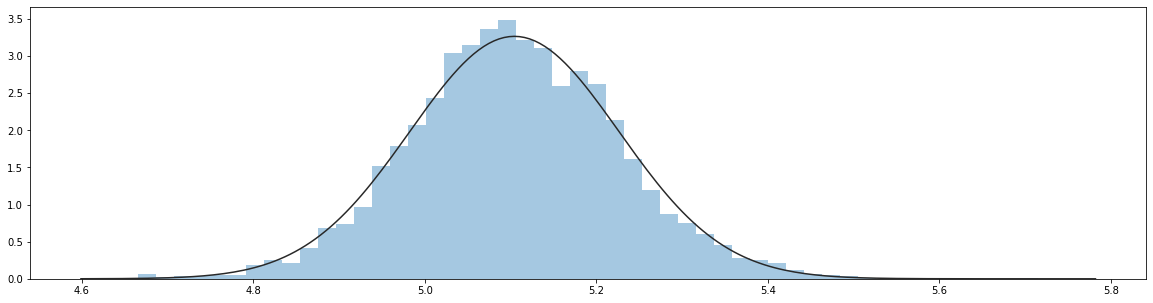

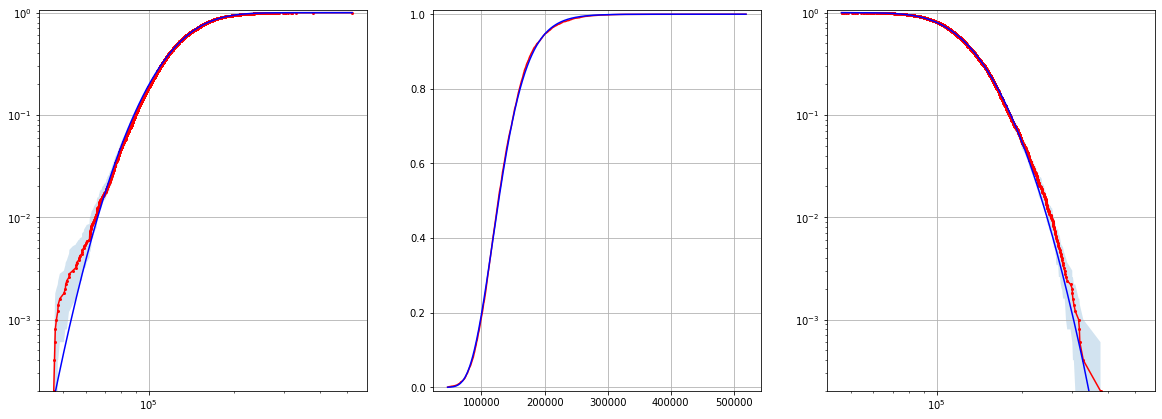



**************************************************************************
39 : ../../experiments/csvs_probSAT/gen_n200_m853_k3SAT_seed1929338155.csv
**************************************************************************
lognormal parameters: sigma 0.40588132798541626, mu 13.43122392946881, location 207666.47562188344


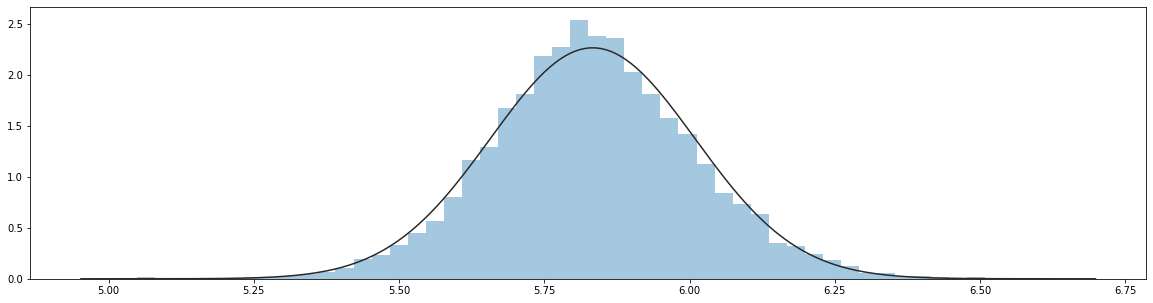

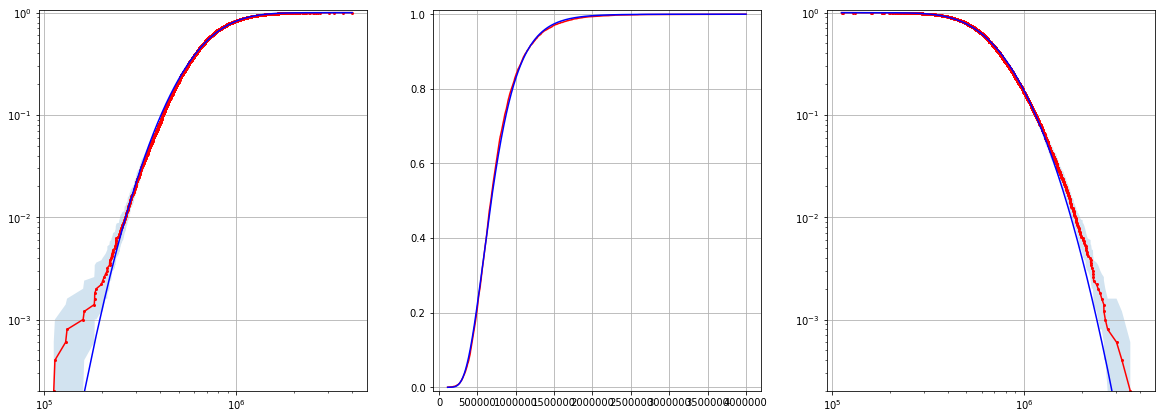



***************************************************************************
40 : ../../experiments/csvs_probSAT/gen_n300_m1280_k3SAT_seed3275703685.csv
***************************************************************************
lognormal parameters: sigma 0.34912644076407334, mu 11.675478483831482, location 78014.54718350557


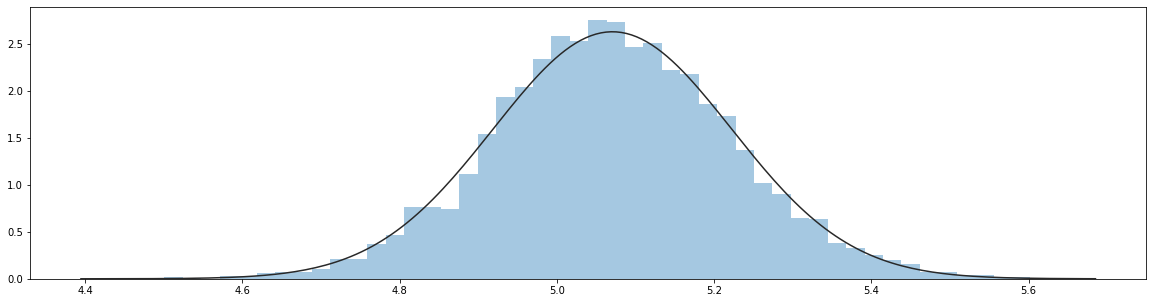

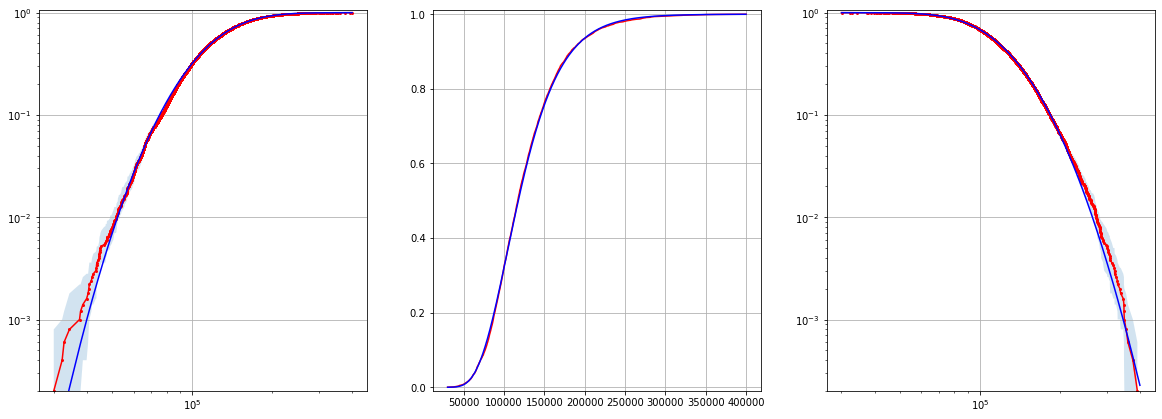



***************************************************************************
41 : ../../experiments/csvs_probSAT/gen_n300_m1280_k3SAT_seed2999771048.csv
***************************************************************************
lognormal parameters: sigma 0.23549141720088812, mu 11.906052794746333, location 40525.052083193834


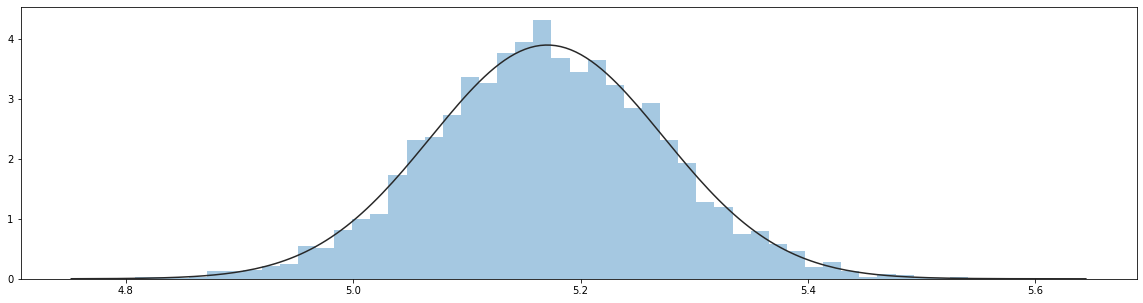

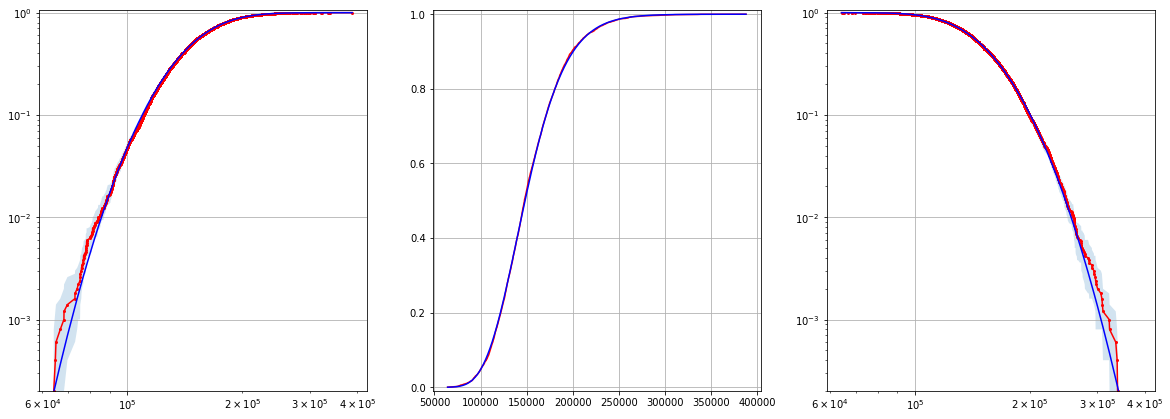



***************************************************************************
42 : ../../experiments/csvs_probSAT/gen_n300_m1280_k3SAT_seed2990260697.csv
***************************************************************************
lognormal parameters: sigma 0.11190715891556209, mu 9.001155633293235, location 1392.66486747115


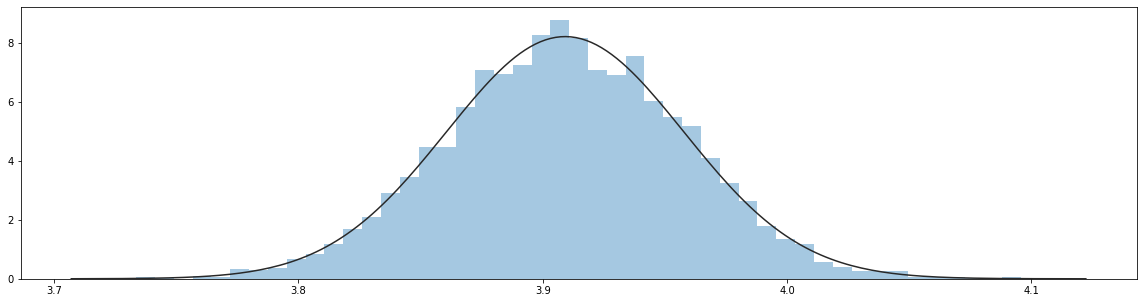

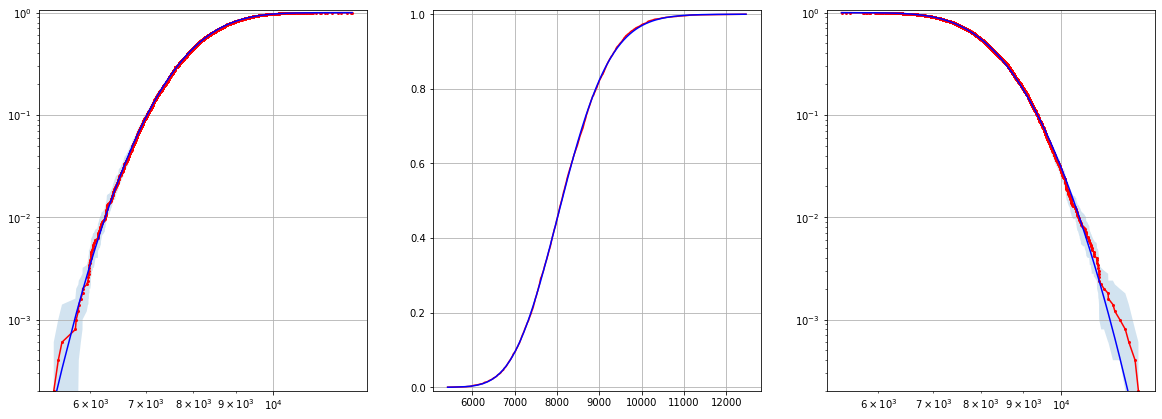



***************************************************************************
43 : ../../experiments/csvs_probSAT/gen_n300_m1280_k3SAT_seed4120618906.csv
***************************************************************************
lognormal parameters: sigma 0.34197162049821694, mu 14.19064956531548, location 293091.1960146292


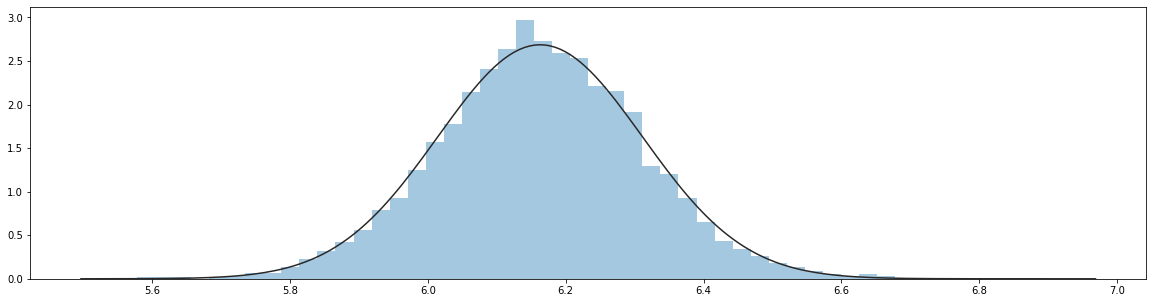

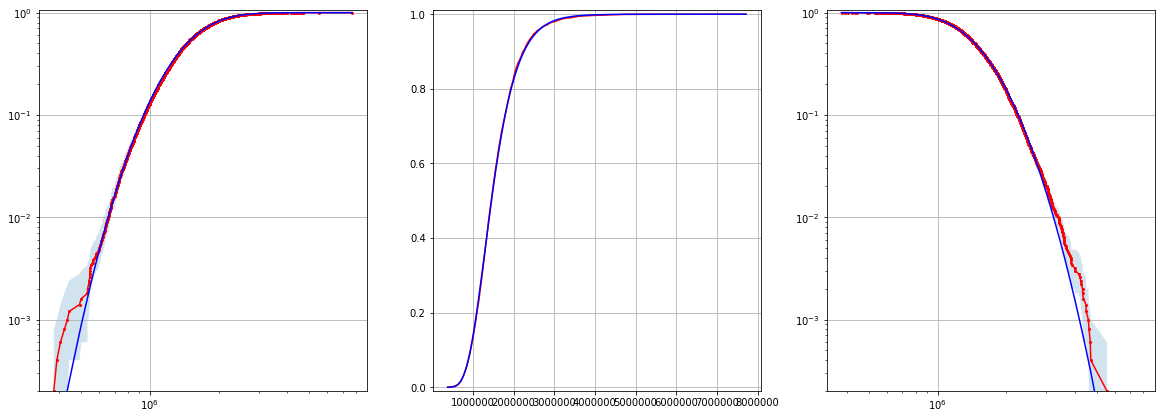



**************************************************************************
44 : ../../experiments/csvs_probSAT/gen_n300_m1280_k3SAT_seed618188454.csv
**************************************************************************
lognormal parameters: sigma 0.2299000788503278, mu 10.6262827727052, location 24668.552385076557


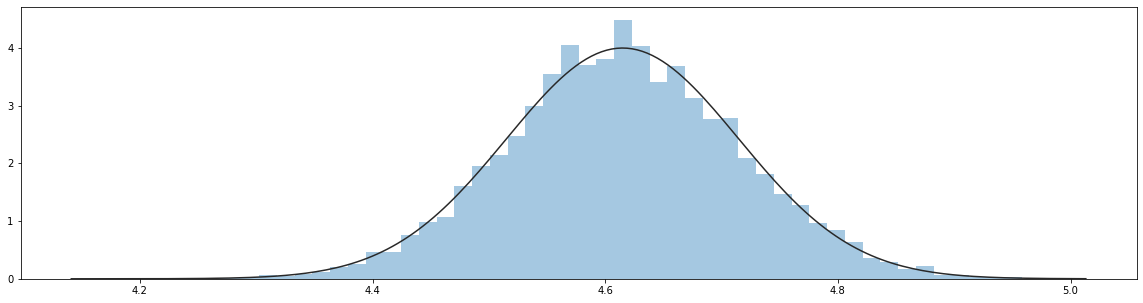

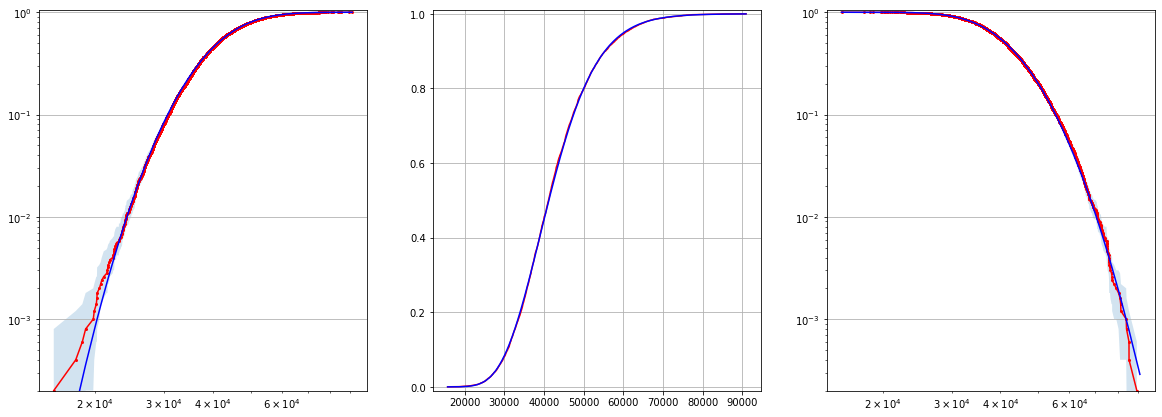



***************************************************************************
45 : ../../experiments/csvs_probSAT/gen_n300_m1280_k3SAT_seed1986560904.csv
***************************************************************************
lognormal parameters: sigma 0.21069481142935773, mu 9.713788261878713, location 11102.07473531337


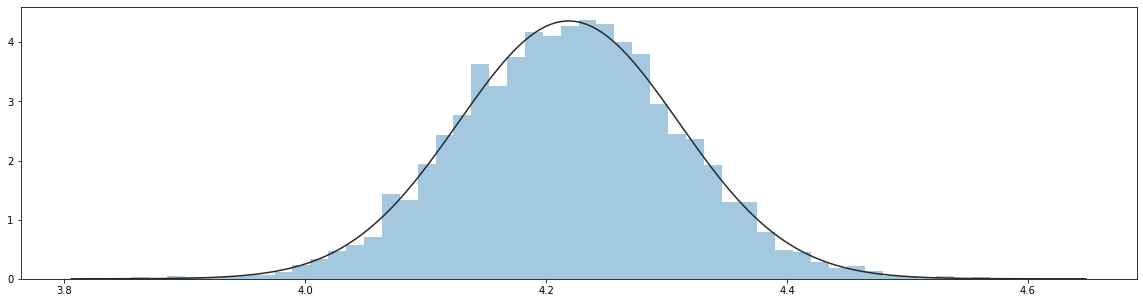

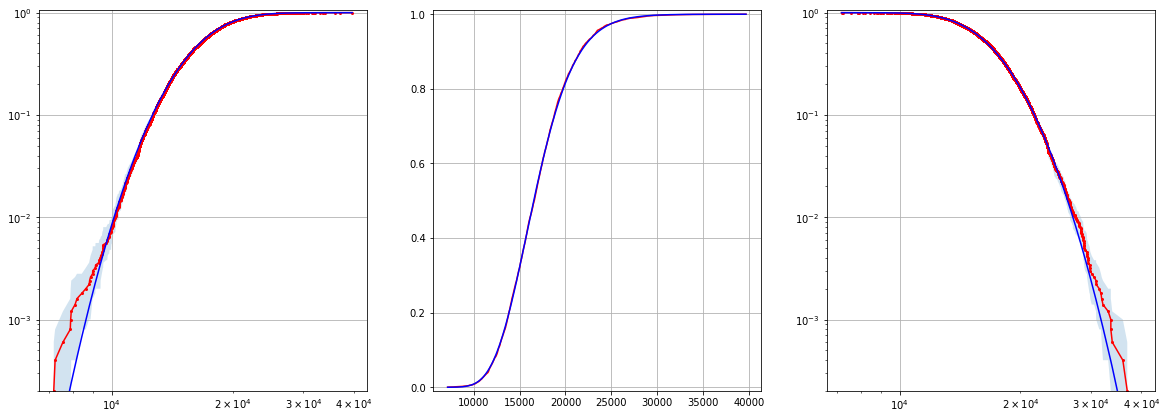



***************************************************************************
46 : ../../experiments/csvs_probSAT/gen_n300_m1280_k3SAT_seed2884700867.csv
***************************************************************************
lognormal parameters: sigma 0.31405850025927895, mu 11.030824707972837, location 40171.73241867635


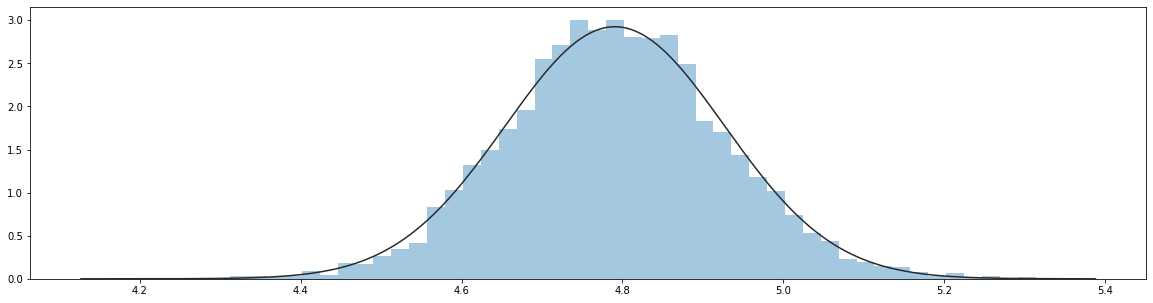

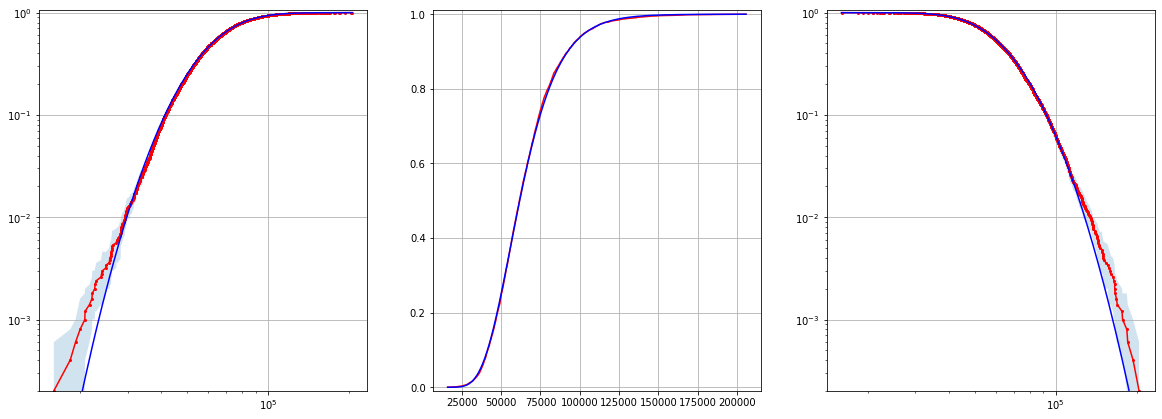



**************************************************************************
47 : ../../experiments/csvs_probSAT/gen_n300_m1280_k3SAT_seed165578902.csv
**************************************************************************
lognormal parameters: sigma 0.2820402285813594, mu 14.350750891744054, location 100971.82910857553


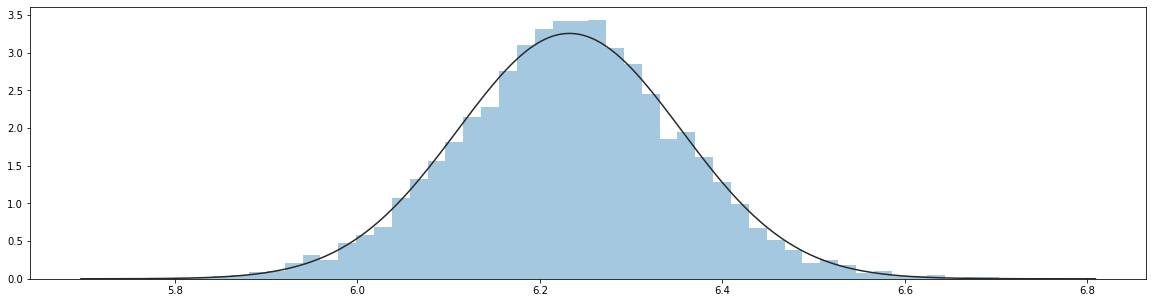

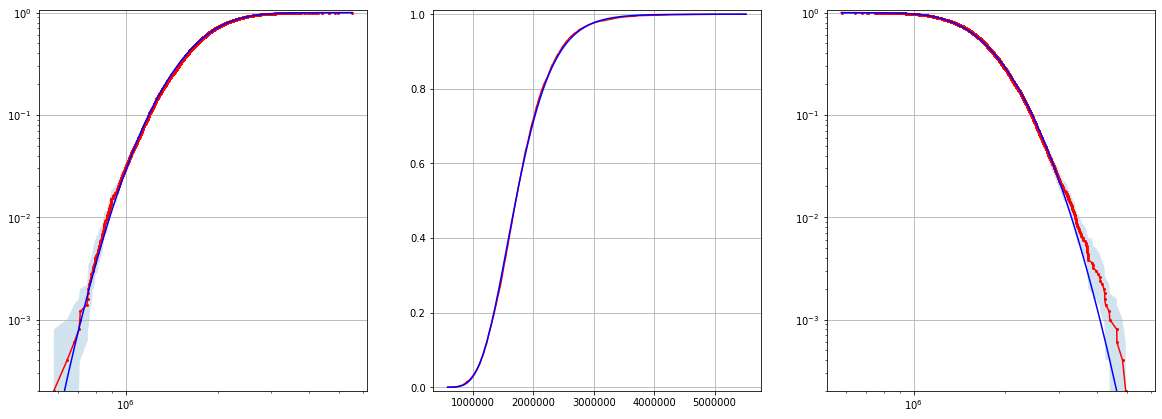



***************************************************************************
48 : ../../experiments/csvs_probSAT/gen_n300_m1280_k3SAT_seed1228722199.csv
***************************************************************************
lognormal parameters: sigma 0.17884189347404858, mu 10.179760344762373, location 10501.622973843492


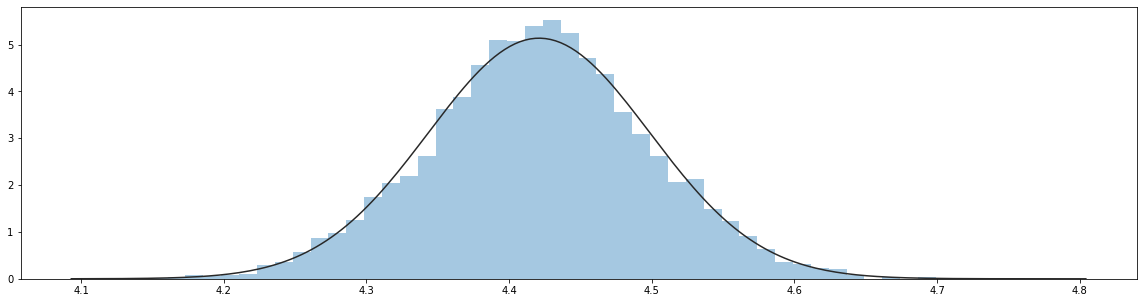

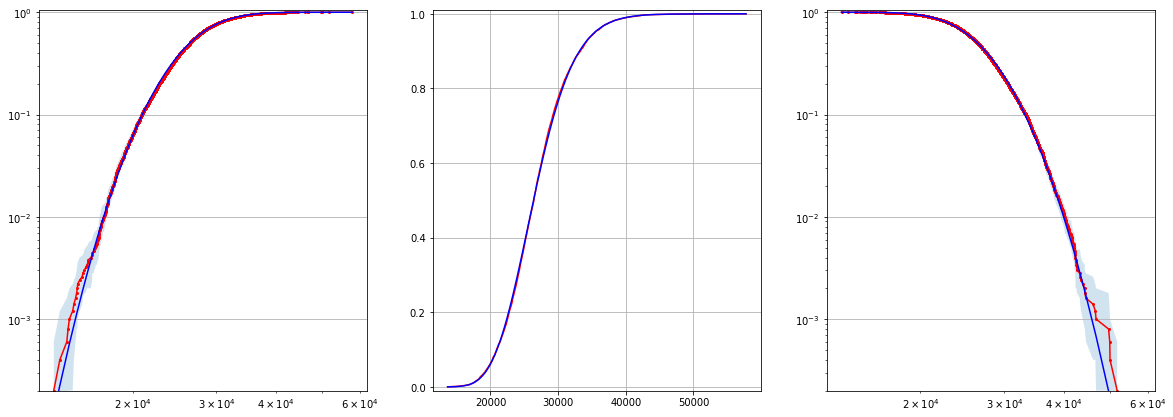



***************************************************************************
49 : ../../experiments/csvs_probSAT/gen_n300_m1280_k3SAT_seed1588610338.csv
***************************************************************************
lognormal parameters: sigma 0.10042092102723858, mu 8.922032056004065, location 845.1252608530574


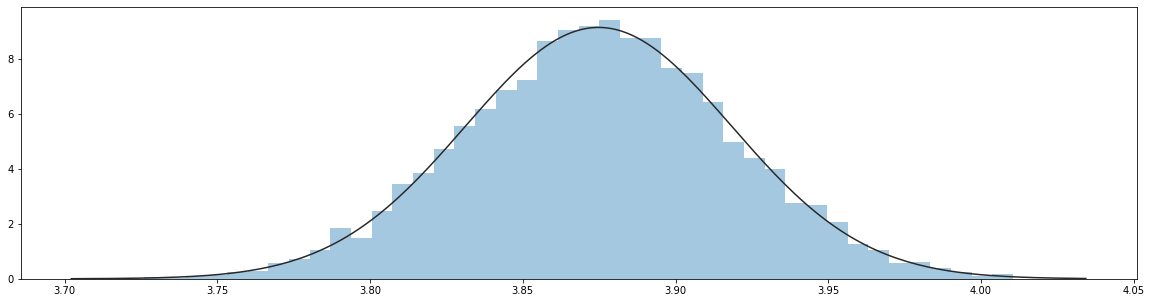

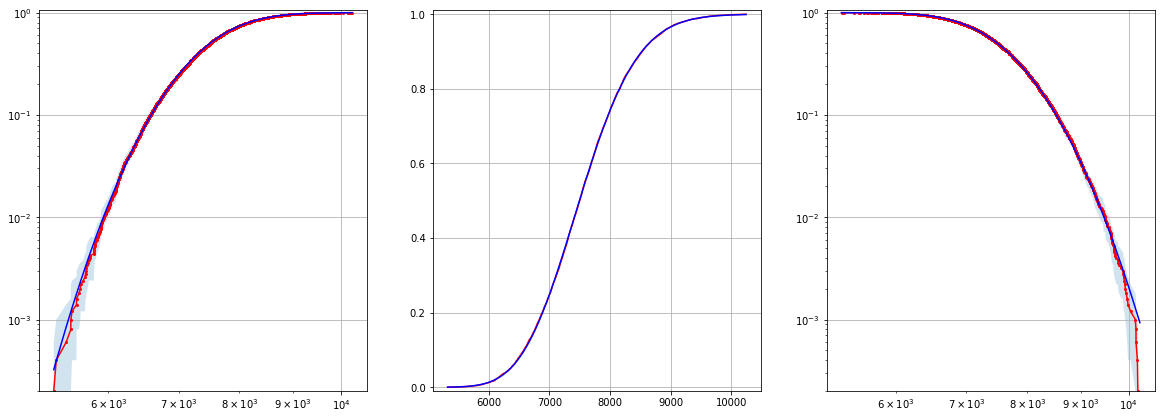



***************************************************************************
50 : ../../experiments/csvs_probSAT/gen_n800_m3414_k3SAT_seed2487936524.csv
***************************************************************************
lognormal parameters: sigma 0.16680929252288695, mu 12.303753604560226, location 59107.81545968069


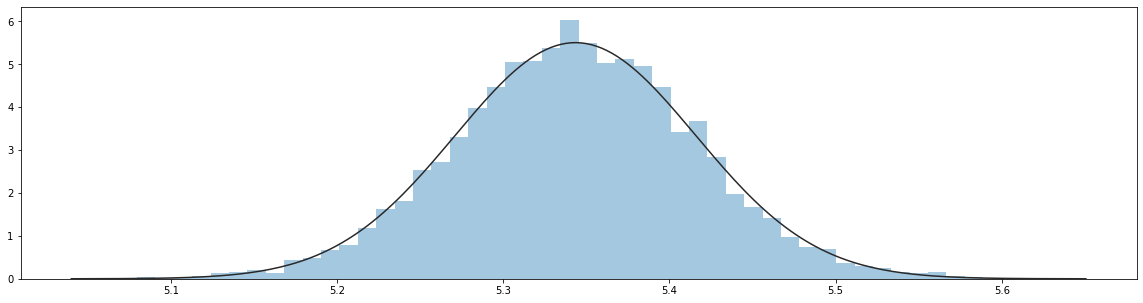

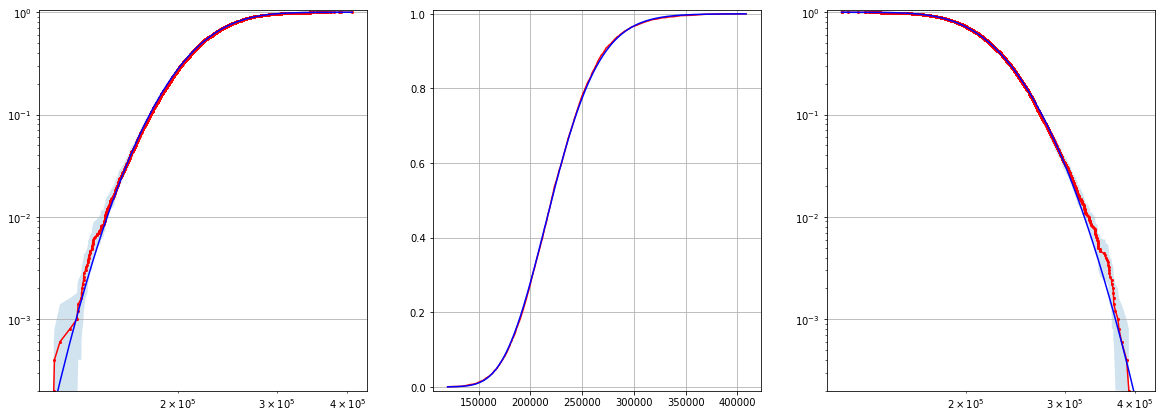



**************************************************************************
51 : ../../experiments/csvs_probSAT/gen_n800_m3414_k3SAT_seed263749128.csv
**************************************************************************
There is a nan-value. This was not supposed to happen.
lognormal parameters: sigma 0.5074817220059439, mu 19.894481899807037, location 61440896.055177905


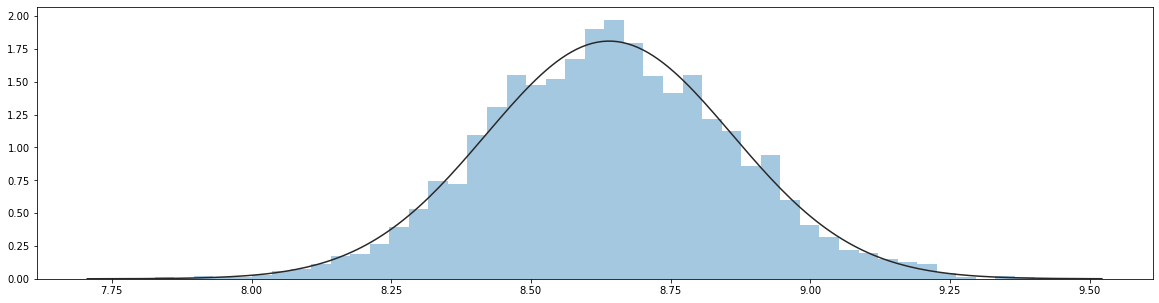

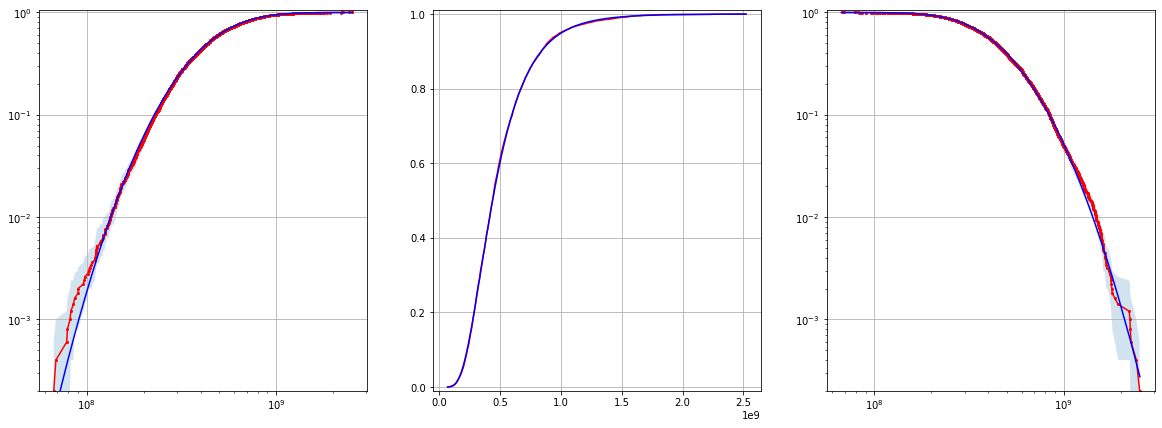



***************************************************************************
52 : ../../experiments/csvs_probSAT/gen_n800_m3414_k3SAT_seed1618881351.csv
***************************************************************************
lognormal parameters: sigma 0.4369122044870715, mu 16.83559498941511, location 5925441.819975654


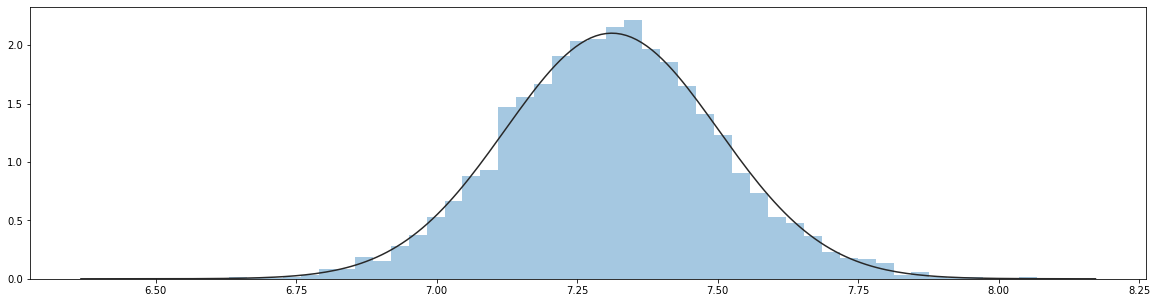

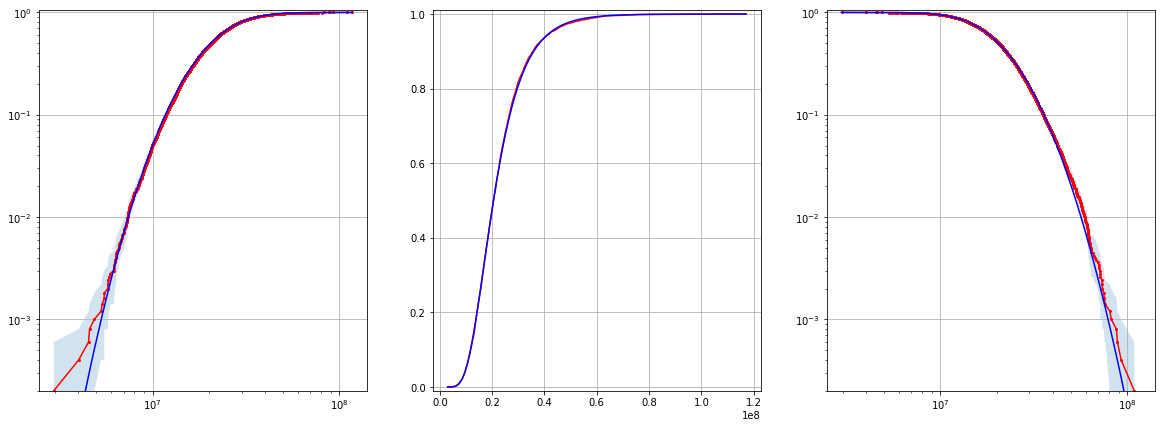



**************************************************************************
53 : ../../experiments/csvs_probSAT/gen_n800_m3414_k3SAT_seed210108687.csv
**************************************************************************
lognormal parameters: sigma 0.3956374076424717, mu 16.916865228983777, location 2894536.5579370423


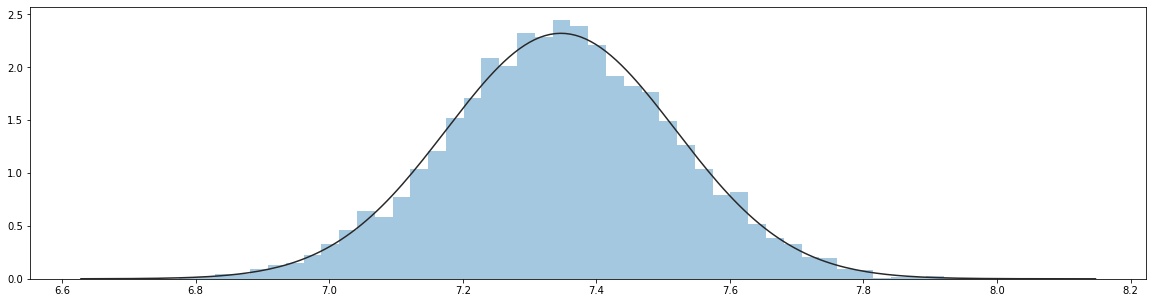

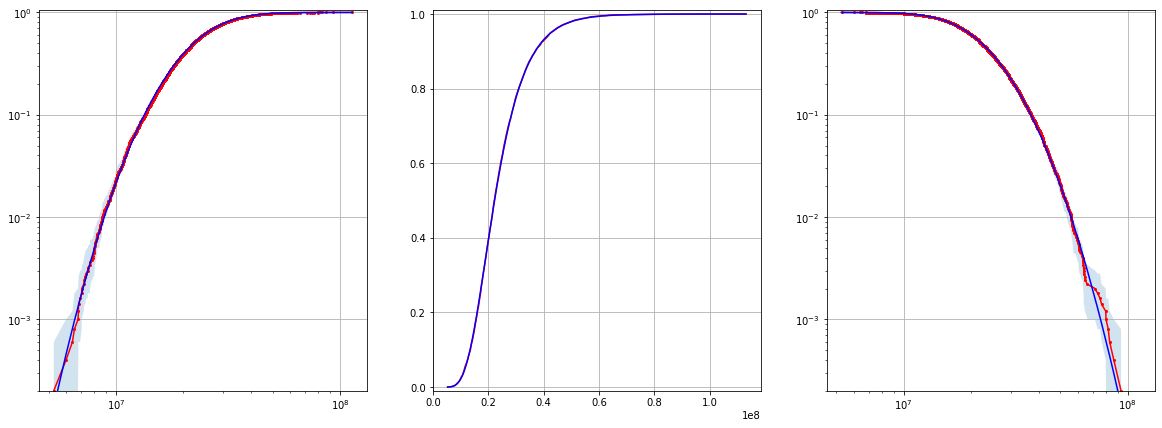



***************************************************************************
54 : ../../experiments/csvs_probSAT/gen_n800_m3414_k3SAT_seed4045445228.csv
***************************************************************************
lognormal parameters: sigma 0.43156131371591394, mu 19.418496918427916, location 40095450.53960475


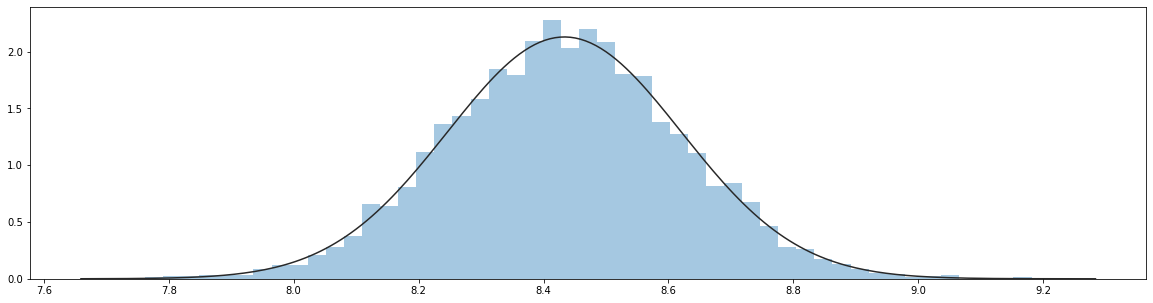

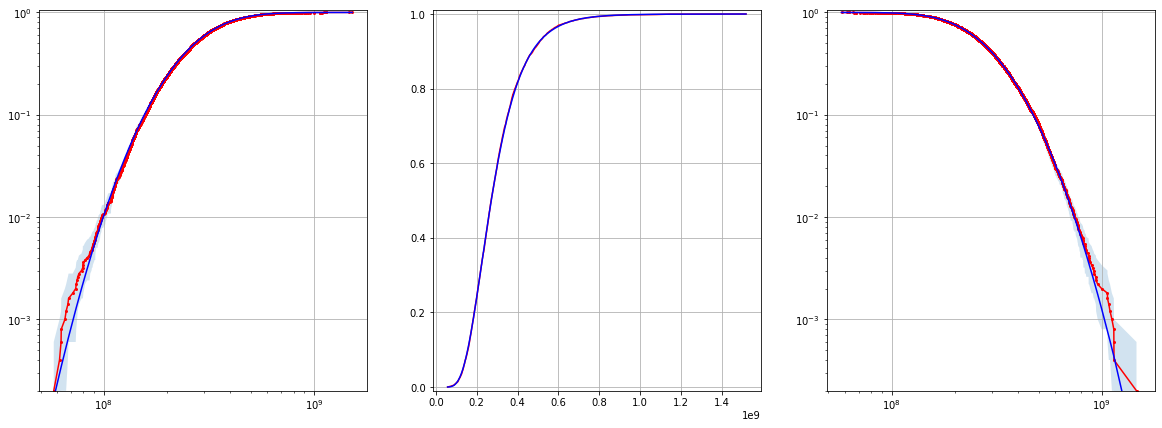

In [5]:
# Select the number of instances to interate over...
N = len(instances)

# ... and iterate over all instances to generate the plots.
for index in range(N):
    # Selection of a concrete instance and name printing
    name = instances[index]
    
    print("*" * (len(name) + len(str(index)) + 3))
    print(index, ":", name)
    print("*" * (len(name) + len(str(index)) + 3))   

    #
    # Manipulate the corresponding data frame:
    # We are only interested in the flip-values, not in the runtime, or seed used.
    #
    df = pd.read_csv(name, index_col=[0,1])
    df.drop(index=['seed', 'runtime'], level=1, inplace=True)

    # Checks if any values are nan.
    if df.isnull().values.any():
        print("There is a nan-value. This was not supposed to happen.")
        
    # Next, we are going to calculate $\mathsf{mean}_{S} (F^{(i)})$,
    # i.e., the number of flips required to solve instance $F^{(i)}$ with solver $S$.
    # This then is the hardness distribution we are going to analyze.    
    means = df.mean(axis=1)
    means = np.sort(means)  
        
    #
    # Print the plots with location parameter
    #    
    
    # Scipy can be used to fit a location parameter. 
    # In practise, however, this does not work properly.
    # Thus, we use our own method `minimize_nnlf` 
    # that can be found in the `empirical` package.
    # This method must be provided with the data object `means`, 
    # a lower bound for the location parameter, here `0.0`,
    # and an upper bound for the location parameter, # here `means[0]-0.0001`.
    # This method then yields a location parameter maximizing the likelihood.
    m = minimize_nnlf(means, 0.0, means[0]-0.0001)
    means = means - m 

    plt.figure(figsize=(20,5))
    sns.distplot(np.log10(means), fit=stats.norm, kde=False)

    # Next, we fit a two-parametric lognormal distribution 
    # (with forced location parameter zero). Note that means = means - m. 
    # Note that fitting a two-parametric lognormal distribution to 
    # original_data - m is the same as fitting 
    # a three-parametric lognormal distribution to the original_data.
    # Afterwards, we can use our own location parameter.
    s, loc, scale = lognorm.fit(means, floc=0)
    print(f"lognormal parameters: sigma {s}, mu {np.log(scale)}, location {m}")
    rv = lognorm(s, loc, scale)
    rv_all = lognorm(s, m, scale)
    
    plot_and_compare_cdf(means, rv, plot_confidence=True)
    
    plt.show(block=False)
    
    print("\n")

## Statistical Tests

As described in the paper, we use the chi squared test to check the goodness-of-fit.

We print the obtained p-values for each base instance.

(The p-values obtained by the original $\chi^2$-test and the bootstrapping-test were calculated seperately and can be found in `./evaluation/evaluate_logn/all.csv` for all solver and instance combinations. The reason for this is that it takes several hours to compute these values because of the bootstrapping.)

In [12]:
# Use the instance list as a selector for the correct rows in the `all.csv` file.
selector = [path.split('../../experiments/')[1] for path in instances]

In [13]:
# Extract the relevant rows from the data frame.
file = '../evaluate_logn/all.csv'
df = pd.read_csv(file, index_col=False)
df = df[df['instance'].isin(selector)]

# Sort the entries to match the order of the diagrams above.
df['instance'] = pd.Categorical(
    df['instance'], 
    categories=selector, 
    ordered=True
)
df.sort_values('instance', inplace=True)

# Show the instance name without path
df['instance'] = df['instance'].map(lambda name: name.split("/")[-1].split(".csv")[0])

# Mark entries where p_orig < 0.05
stars = np.where(df['p_orig']<0.05, '*', ' ')
df.loc[:, 'p_orig < 0.05'] = stars.tolist()

# Mark entries where p_new < 0.05
stars = np.where(df['p_new']<0.05, '*', ' ')
df.loc[:, 'p_new < 0.05'] = stars.tolist()

# Add the index we used
index = list(range(len(instances)))
df['index'] = index

# Change order of columns s.th. index is the first one
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

df

index     type                             instance    p_orig  p_new  \
303      0  probSAT    gen_n50_m213_k3SAT_seed1181241944  0.769534  0.780   
272      1  probSAT     gen_n50_m213_k3SAT_seed958682847  0.002747  0.001   
285      2  probSAT    gen_n50_m213_k3SAT_seed3184935164  0.398962  0.410   
263      3  probSAT    gen_n50_m213_k3SAT_seed3163119786  0.355131  0.280   
302      4  probSAT    gen_n50_m213_k3SAT_seed2746317214  0.378517  0.450   
301      5  probSAT     gen_n50_m213_k3SAT_seed440213416  0.245343  0.210   
310      6  probSAT     gen_n50_m213_k3SAT_seed478163328  0.089842  0.085   
306      7  probSAT    gen_n50_m213_k3SAT_seed1051802513  0.962496  0.980   
279      8  probSAT     gen_n50_m213_k3SAT_seed107420370  0.002480  0.003   
295      9  probSAT     gen_n50_m213_k3SAT_seed599310826  0.132011  0.131   
300     10  probSAT    gen_n100_m427_k3SAT_seed136505588  0.033665  0.035   
312     11  probSAT   gen_n100_m427_k3SAT_seed2342331445  0.501193  0.460   
299     12  probSAT   gen_n100_m427_k3SAT_seed1812140442  0.355131  0.350   
288     13  probSAT   gen_n100_m427_k3SAT_seed2906402158  0.101559  0.099   
293     14  probSAT    gen_n100_m427_k3SAT_seed402418011  0.561893  0.520   
269     15  probSAT   gen_n100_m427_k3SAT_seed3831882065  0.635129  0.580   
284     16  probSAT   gen_n100_m427_k3SAT_seed3181143732  0.454868  0.380   
294     17  probSAT    gen_n100_m427_k3SAT_seed373399427  0.722729  0.640   
282     18  probSAT    gen_n100_m427_k3SAT_seed127978095  0.036973  0.036   
275     19  probSAT   gen_n100_m427_k3SAT_seed2536146026  0.540530  0.480   
305     20  probSAT    gen_n150_m640_k3SAT_seed113971124  0.300867  0.360   
276     21  probSAT   gen_n150_m640_k3SAT_seed2791232394  0.867643  0.850   
273     22  probSAT   gen_n150_m640_k3SAT_seed3012167821  0.662034  0.590   
271     23  probSAT   gen_n150_m640_k3SAT_seed3075280818  0.891787  0.870   
290     24  probSAT    gen_n150_m640_k3SAT_seed999270937  0.268000  0.300   
286     25  probSAT    gen_n150_m640_k3SAT_seed939042956  0.184224  0.240   
262     26  probSAT   gen_n150_m640_k3SAT_seed2170484434  0.033034  0.040   
278     27  probSAT    gen_n150_m640_k3SAT_seed854001194  0.544098  0.530   
308     28  probSAT   gen_n150_m640_k3SAT_seed2410529191  0.837873  0.900   
289     29  probSAT   gen_n150_m640_k3SAT_seed2585650757  0.755378  0.690   
307     30  probSAT   gen_n200_m853_k3SAT_seed2530876845  0.060819  0.065   
296     31  probSAT   gen_n200_m853_k3SAT_seed3259052812  0.335540  0.280   
265     32  probSAT   gen_n200_m853_k3SAT_seed1194819985  0.378517  0.450   
298     33  probSAT   gen_n200_m853_k3SAT_seed3476477324  0.342021  0.260   
304     34  probSAT    gen_n200_m853_k3SAT_seed946785249  0.497616  0.490   
309     35  probSAT   gen_n200_m853_k3SAT_seed2340505847  0.903422  0.890   
277     36  probSAT   gen_n200_m853_k3SAT_seed1801823909  0.268000  0.300   
261     37  probSAT     gen_n200_m853_k3SAT_seed27911968  0.184224  0.280   
311     38  probSAT   gen_n200_m853_k3SAT_seed3733616460  0.398962  0.380   
297     39  probSAT   gen_n200_m853_k3SAT_seed1929338155  0.472628  0.430   
281     40  probSAT  gen_n300_m1280_k3SAT_seed3275703685  0.558341  0.580   
314     41  probSAT  gen_n300_m1280_k3SAT_seed2999771048  0.752494  0.750   
292     42  probSAT  gen_n300_m1280_k3SAT_seed2990260697  0.007601  0.013   
268     43  probSAT  gen_n300_m1280_k3SAT_seed4120618906  0.447794  0.480   
267     44  probSAT   gen_n300_m1280_k3SAT_seed618188454  0.208403  0.280   
287     45  probSAT  gen_n300_m1280_k3SAT_seed1986560904  0.067262  0.067   
260     46  probSAT  gen_n300_m1280_k3SAT_seed2884700867  0.000781  0.001   
270     47  probSAT   gen_n300_m1280_k3SAT_seed165578902  0.153536  0.200   
313     48  probSAT  gen_n300_m1280_k3SAT_seed1228722199  0.335540  0.380   
274     49  probSAT  gen_n300_m1280_k3SAT_seed1588610338  0.576058  0.550   
264     50  probSAT  gen_n800_m3414_k3SAT_seed2487936524  0.365087  0.420   
2

## Additional statistics

Calculate the average of means and the standard deviation of the means for each base instance.

In [36]:
# This table takes a few seconds to generate.

datarows = []

for index in range(len(instances)):
    name = instances[index]
    df_for_instance = pd.read_csv(name, index_col=[0,1])
    df_for_instance.drop(index=['seed', 'runtime'], level=1, inplace=True)
    means_for_instance = df_for_instance.mean(axis=1)
    name = name.split("/")[-1]
    mean = round(means_for_instance.mean(), 1)
    std_of_means = round(means_for_instance.std(), 1)
    #print(f"{name}: average of means {means.mean()}; std of means {means.std()}")
    
    datarows.append([name, mean, std_of_means])
    
df3 = pd.DataFrame(np.array([row for row in datarows]),
                   columns=['instance', 'average of means', 'std dev of means'])
df3

instance average of means std dev of means
0     gen_n50_m213_k3SAT_seed1181241944.csv            456.1             94.2
1      gen_n50_m213_k3SAT_seed958682847.csv           6354.0           2934.8
2     gen_n50_m213_k3SAT_seed3184935164.csv           1261.3            436.8
3     gen_n50_m213_k3SAT_seed3163119786.csv            395.0             72.4
4     gen_n50_m213_k3SAT_seed2746317214.csv            223.1             28.4
5      gen_n50_m213_k3SAT_seed440213416.csv           8579.2           5079.2
6      gen_n50_m213_k3SAT_seed478163328.csv            249.9             32.1
7     gen_n50_m213_k3SAT_seed1051802513.csv            446.2             96.9
8      gen_n50_m213_k3SAT_seed107420370.csv            662.2            115.4
9      gen_n50_m213_k3SAT_seed599310826.csv            125.0             14.6
10    gen_n100_m427_k3SAT_seed136505588.csv           1379.0            211.2
11   gen_n100_m427_k3SAT_seed2342331445.csv           7201.1           2589.3
12   gen_n100_m427_k3SAT_seed1812140442.csv            668.3             62.1
13   gen_n100_m427_k3SAT_seed2906402158.csv            617.0             74.5
14    gen_n100_m427_k3SAT_seed402418011.csv          12428.9           1915.1
15   gen_n100_m427_k3SAT_seed3831882065.csv           5410.5           2594.5
16   gen_n100_m427_k3SAT_seed3181143732.csv            575.4             61.0
17    gen_n100_m427_k3SAT_seed373399427.csv           5279.9            707.4
18    gen_n100_m427_k3SAT_seed127978095.csv           3459.1           1123.1
19   gen_n100_m427_k3SAT_seed2536146026.csv           2528.8            682.2
20    gen_n150_m640_k3SAT_seed113971124.csv           5316.3            587.6
21   gen_n150_m640_k3SAT_seed2791232394.csv           3080.4            346.9
22   gen_n150_m640_k3SAT_seed3012167821.csv           8984.6           1098.8
23   gen_n150_m640_k3SAT_seed3075280818.csv           3204.1            307.6
24    gen_n150_m640_k3SAT_seed999270937.csv        5915159.1        1759504.9
25    gen_n150_m640_k3SAT_seed939042956.csv           8288.7           1363.9
26   gen_n150_m640_k3SAT_seed2170484434.csv           3874.6            420.2
27    gen_n150_m640_k3SAT_seed854001194.csv           2146.0            194.5
28   gen_n150_m640_k3SAT_seed2410529191.csv           2237.5            212.3
29   gen_n150_m640_k3SAT_seed2585650757.csv          27581.0           5855.7
30   gen_n200_m853_k3SAT_seed2530876845.csv          41652.2           7679.0
31   gen_n200_m853_k3SAT_seed3259052812.csv         888416.8         272281.5
32   gen_n200_m853_k3SAT_seed1194819985.csv          26660.5           3738.3
33   gen_n200_m853_k3SAT_seed3476477324.csv        5553114.8        1577234.1
34    gen_n200_m853_k3SAT_seed946785249.csv          15860.8           2166.0
35   gen_n200_m853_k3SAT_seed2340505847.csv          17288.8           2134.7
36   gen_n200_m853_k3SAT_seed1801823909.csv           3185.3            273.2
37     gen_n200_m853_k3SAT_seed27911968.csv           5834.8            524.8
38   gen_n200_m853_k3SAT_seed3733616460.csv         173633.0          38552.4
39   gen_n200_m853_k3SAT_seed1929338155.csv         948117.2         326058.0
40  gen_n300_m1280_k3SAT_seed3275703685.csv         203098.8          45552.6
41  gen_n300_m1280_k3SAT_seed2999771048.csv         192859.5          36548.5
42  gen_n300_m1280_k3SAT_seed2990260697.csv           9556.1            916.8
43  gen_n300_m1280_k3SAT_seed4120618906.csv        1836638.1         555693.1
44   gen_n300_m1280_k3SAT_seed618188454.csv          66976.5           9871.3
45  gen_n300_m1280_k3SAT_seed1986560904.csv          28018.2           3620.1
46  gen_n300_m1280_k3SAT_seed2884700867.csv         105064.3          21241.5
47   gen_n300_m1280_k3SAT_seed165578902.csv        1878410.0         516987.8
48  gen_n300_m1280_k3SAT_seed1228722199.csv          37291.2           4843.2
49  gen_n300_m1280_k3SAT_seed1588610338.csv           8378.3            758.1
50  gen_n800_m3414_k3SAT_seed2487936524.csv         28272